# Análisis de datos

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


# Desarrollo

## 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns; sns.set()

#### Lectura del dataset

In [2]:
dataset = pd.read_csv("weatherAUS.csv")

#### Visualizacion de las primeras 5 filas

In [3]:
dataset.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

#### Resumen de 5 números
A través de '.describe' se muestra un resumen estadístico del dataset incluyendo el de los 5 números (valor minimo, el 1er cuartil, la mediana, el 3er cuartil y el valor máximo)

In [4]:
dataset.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

#### Identificación de los tipos de datos e identificación de entradas y salidas

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Del resumen del dataset se desprenden las siguiente conclusiones:
- El dataset cuenta con 145460 muestras, 22 features y una salida ("Rain Tomorrow").
- Solo las feature 'Date' y 'Location' estan completas por lo que es necesario hacer ingenieria de features, estudiando cada caso.
- Detectamos 1 variable compuesta:
  - Date: Fecha de observación codificada en Año-Mes-Dia
- Detectamos 7 variables categóricas:
  - Location: Nombre propio de la ciudad
  - WindGustDir: Dirección de la rafaga de viento más fuerte del día, codificado con los puntos cardinales.
  - WindDir9am: Dirección del viento a las 9 am, codificado con los puntos cardinales.
  - WindDir3pm: Dirección del viento a las 3 pm, codificado con los puntos cardinales.
  - Cloud9am: Fracción del cielo obstruido a las 9 am, medido en oktas* *.
  - Cloud3pm: Fracción del cielo obstruido a las 3 pm, medido en oktas.
  - RainToday: Indicación booleana de Si/No
- Detectamos 14 variables numéricas tipo _flotante de 64 bits_:
  - MinTemp: Temperatura minima en grados celsius
  - MaxTemp: Temperatura máxima en grados celsius
  - Rainfall: Lluvia caida durante el dia en mm
  - Evaporation: Evaporacion de la bandeja (Pan evaporation*).
  - Sunshine: Número de horas de sol durante el día.
  - WindGustSpeed: Velocidad de la rafaga de viento más fuerte del dia en km/h.
  - WindSpeed9am: Velocidad del viento promedio durante las 8:50 am y las 9 am en km/h.
  - WindSpeed3pm: Velocidad del viento promedio durante las 2:50 pm y las 3 pm en km/h.
  - Humidity9am: Humedad en % a las 9 am.
  - Humidity3pm: Humedad en % a las 3 pm.
  - Pressure9am: Presión atmosférica a las 9 am en hpa.
  - Pressure3pm: Presión atmosférica a las 3 pm en hpa.
  - Temp9am: Temperatura a las 9 am en grados celsius.
  - Temp3pm: Temperatura a las 3 pm en grados celsius.
- Una salida tipo categórica:
  - RainTomorrow: Indicación booleana de Si/No
  
 
_*Pan-evaporation: sistema de medición del tiempo que integra varias condiciones climáticas que incluyen lluvia, humedad, radiación solar, viento, temperatura y dispersión de la sequía_

_* *La medicion en oktas va de 0 a 8 ya que se indican cuantos octavos del cielo estan cubierto de nubes._

In [6]:
categoricas = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']
numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', \
             'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', \
             'Pressure3pm', 'Temp9am', 'Temp3pm']
compuestas = ['Date']
salida = ['RainTomorrow']

##### Calculo de datos faltantes

In [7]:
def calc_null(dta):
    """
    Esta función calcula la cantidad numerica y porcentual de
    datos faltantes de cada columna del dataset de entrada.
    """
    cant_null = []
    porc_null = []
    for feature in dta.columns:
        cant_null.append(sum(dta[feature].isnull()))
        porc_null.append(sum(dta[feature].isnull())*100/dta.shape[0])
    return cant_null, porc_null 

cant_null, porc_null = calc_null(dataset)
orden =  np.argsort(porc_null)[::-1]

print("Datos Faltantes:")
for i in range(len(orden)):
    if cant_null[orden[i]] != 0:
        print(f"{dataset.columns[orden[i]]}:\tDatos Nan: {cant_null[orden[i]]}\tEn%: {porc_null[orden[i]]}")

Datos Faltantes:
Sunshine:	Datos Nan: 69835	En%: 48.00976213391998
Evaporation:	Datos Nan: 62790	En%: 43.1665062560154
Cloud3pm:	Datos Nan: 59358	En%: 40.80709473394748
Cloud9am:	Datos Nan: 55888	En%: 38.42155919153032
Pressure9am:	Datos Nan: 15065	En%: 10.356799120033
Pressure3pm:	Datos Nan: 15028	En%: 10.331362573903478
WindDir9am:	Datos Nan: 10566	En%: 7.263852605527292
WindGustDir:	Datos Nan: 10326	En%: 7.09885879279527
WindGustSpeed:	Datos Nan: 10263	En%: 7.055547916953114
Humidity3pm:	Datos Nan: 4507	En%: 3.09844630826344
WindDir3pm:	Datos Nan: 4228	En%: 2.906641000962464
Temp3pm:	Datos Nan: 3609	En%: 2.4810944589577892
RainTomorrow:	Datos Nan: 3267	En%: 2.245978275814657
RainToday:	Datos Nan: 3261	En%: 2.241853430496356
Rainfall:	Datos Nan: 3261	En%: 2.241853430496356
WindSpeed3pm:	Datos Nan: 3062	En%: 2.105046060772721
Humidity9am:	Datos Nan: 2654	En%: 1.8245565791282827
WindSpeed9am:	Datos Nan: 1767	En%: 1.214766946239516
Temp9am:	Datos Nan: 1767	En%: 1.214766946239516
MinTemp

De los resultados obtenidos vale la pena resaltar dos cuestiones. Primero, que tenemos features con una gran cantidad de datos faltantes, analizaremos cada una de estas variables y se decidirá qué hacer con cada una de ellas, y en segundo lugar, tenemos 3267 muestras que no contienen datos de salida, estas deben ser eliminadas ya que no son útiles ni para el entrenamiento y para el test de nuestro modelo de predicción.

### Variables de entradas
#### Análisis de variables numéricas

Para el analisis de distribución analizaremos en grupos de variables que considero variables semejantes. Agrupé los 14 features en 5 grupos:
- Temperatura
- Humedad
- Presión
- Viento
- Otros

En este estudio evaluaremos si las variables responden a una distribucion gaussina de modo de poder suponer su linealidad. Para ello analizaremos su distribución e independencia.

In [8]:
def show_boxplot(df, variable):
    fig,axes = plt.subplots(1,len(variable),figsize=(22,8),sharex='row',sharey='row')
    for i, var in enumerate(variable):
        sns.boxplot(y=df[var],ax=axes[i])
        
def show_histogram(dt, var):
    fig = dt.hist(xlabelsize=12, ylabelsize=12,figsize=(22,8), bins=30)
    plt.suptitle(var, fontsize=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [9]:
temperatures = ['Temp9am', 'MinTemp', 'Temp3pm', 'MaxTemp']
humidity = ['Humidity9am', 'Humidity3pm']
pressure = ['Pressure9am', 'Pressure3pm']
wind = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
other = ['Sunshine','Rainfall', 'Evaporation']

#### Temperaturas

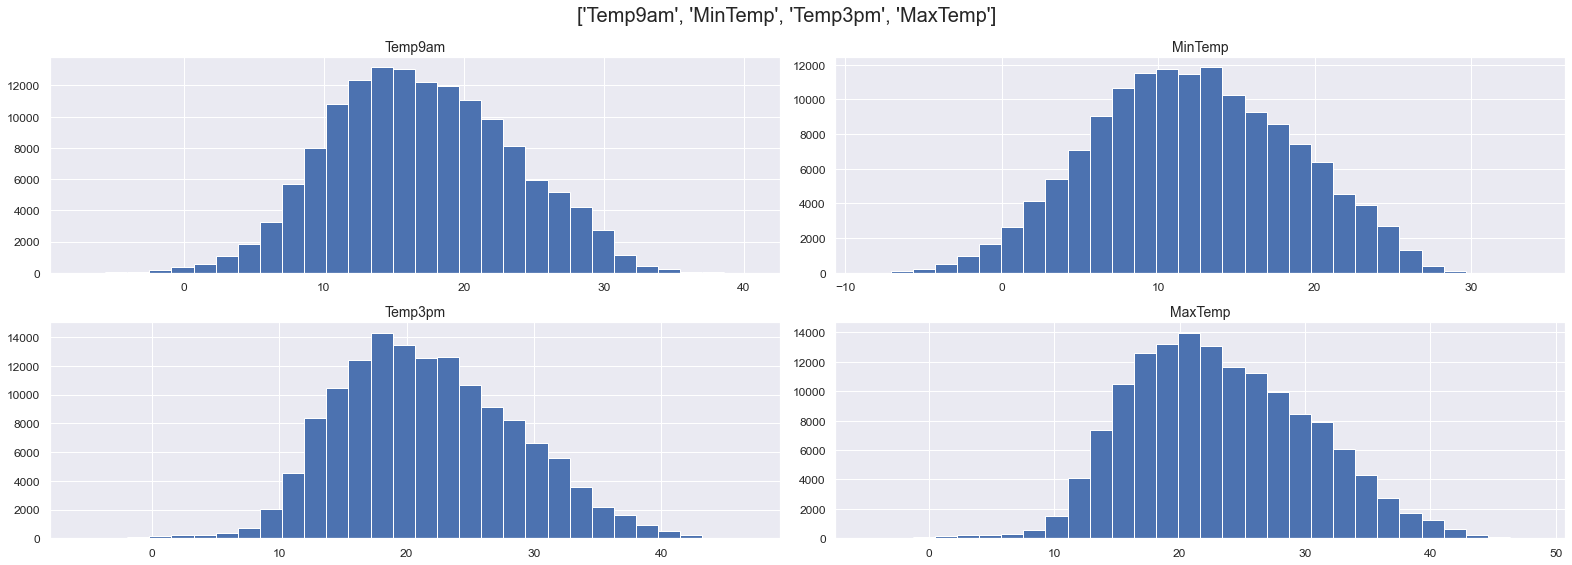

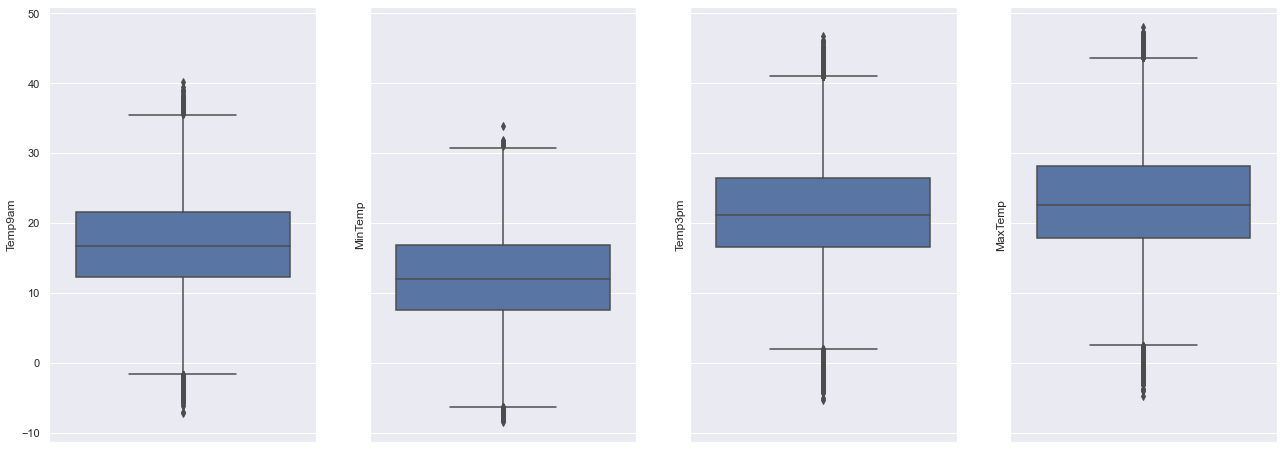

In [10]:
show_histogram(dataset[temperatures], temperatures)
show_boxplot(dataset, temperatures)

**Conclusiones:** las distribuciones de las temperaturas responden en gran medida a una distribucion normal por lo que en principio no es necesario realizar ninguna transformacion sobre ellas.

#### Humedad

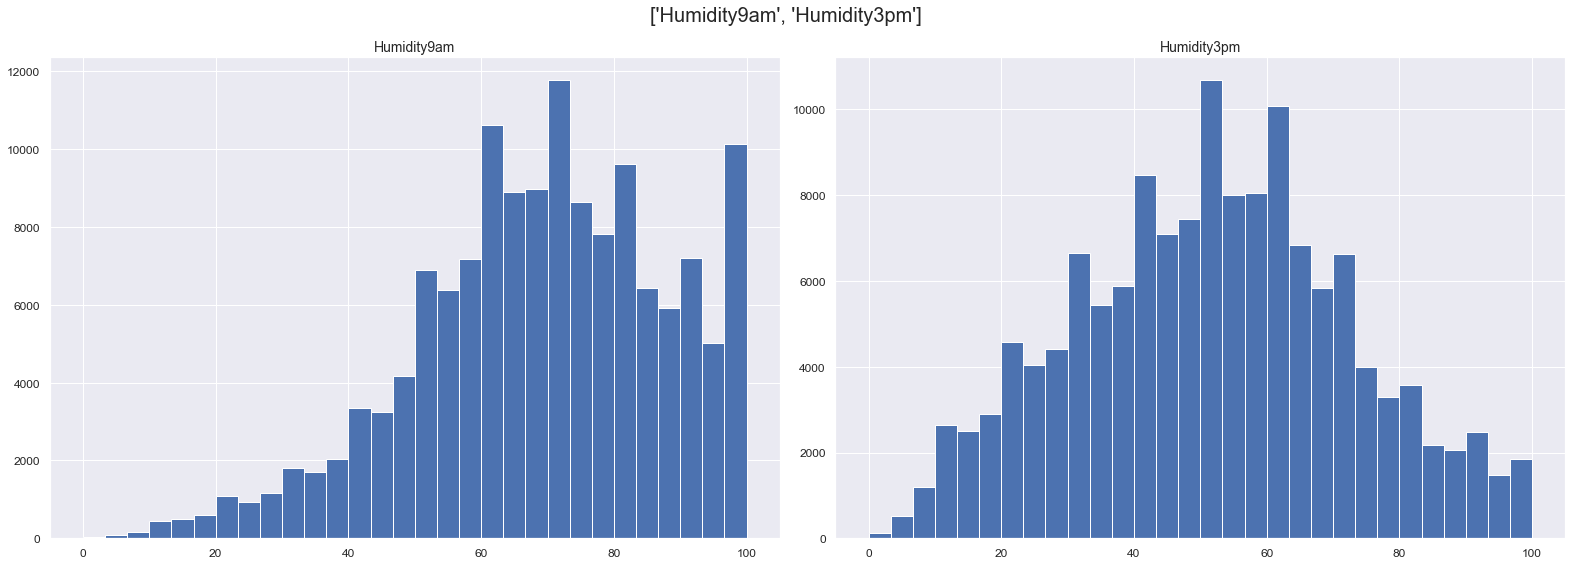

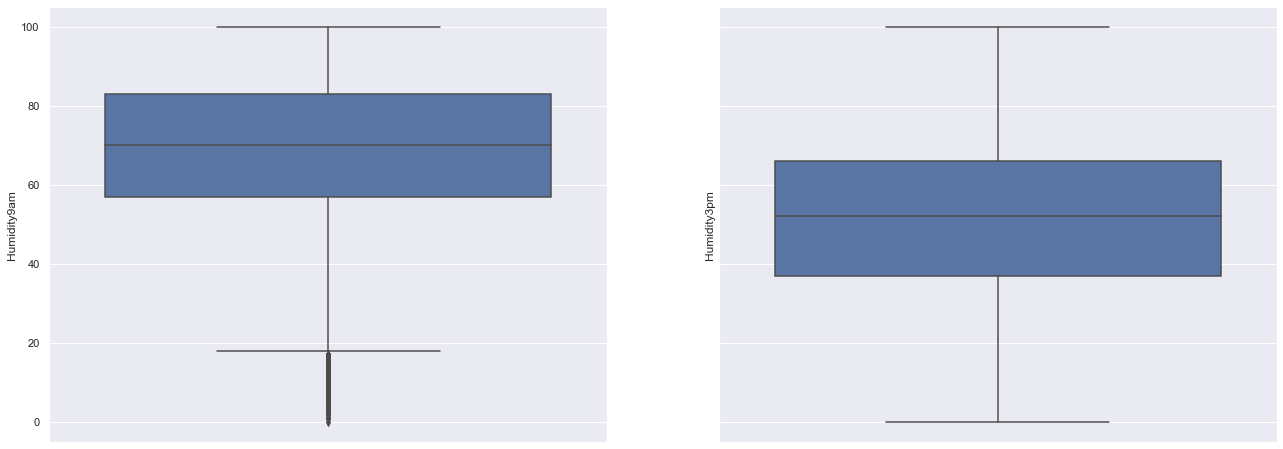

In [11]:
show_histogram(dataset[humidity], humidity)
show_boxplot(dataset, humidity)

**Conclusiones:** las distribuciones de la humedad tienen una marcada oblicuidad hacia uno de sus lados.

#### Presión

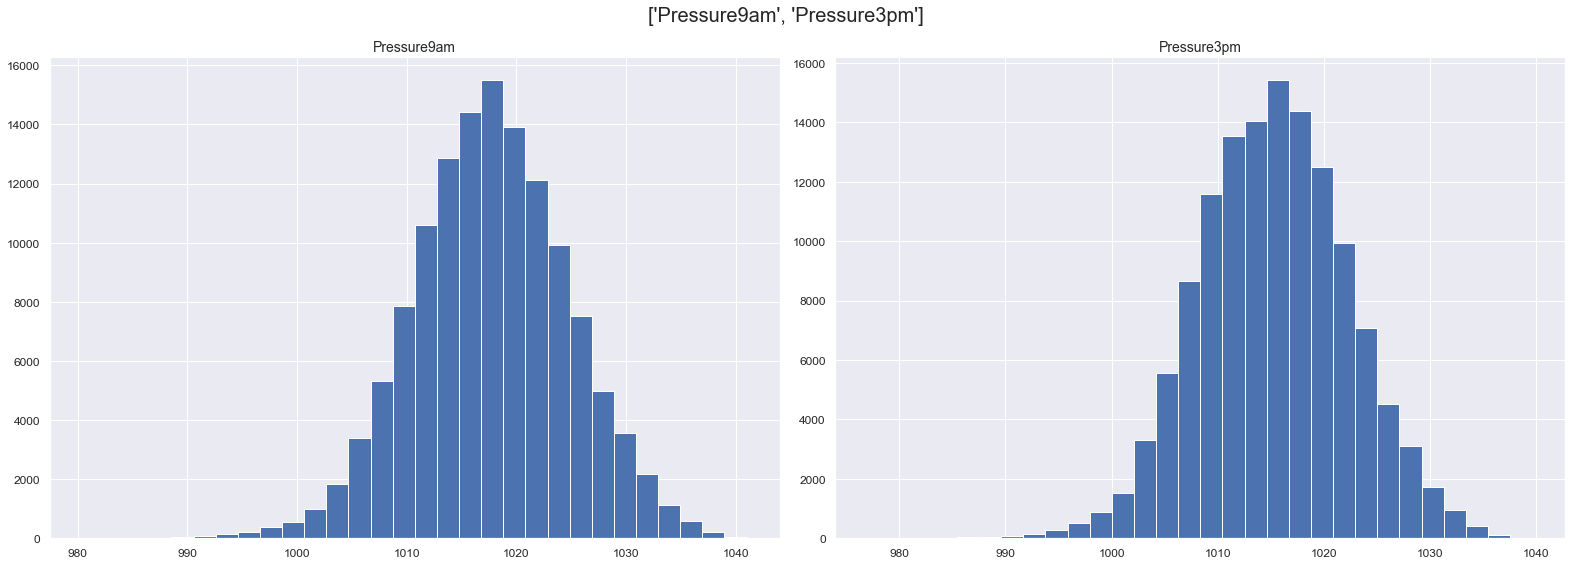

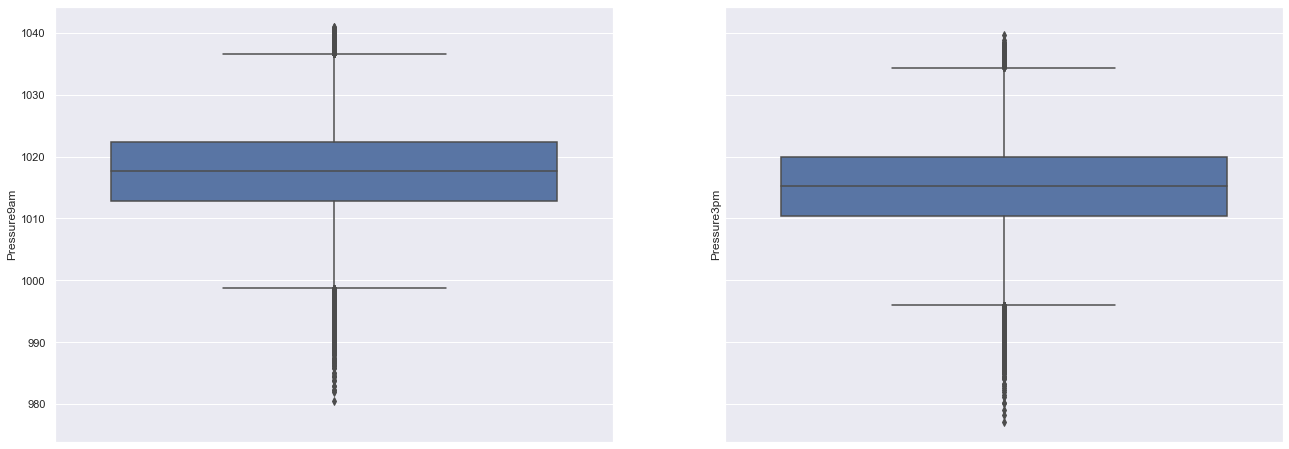

In [12]:
show_histogram(dataset[pressure], pressure)
show_boxplot(dataset, pressure)

**Conclusiones:** las distribuciones de las presiones responden en gran medida a una distribucion normal por lo que en principio no es necesario realizar ninguna transformacion sobre ellas.

#### Viento

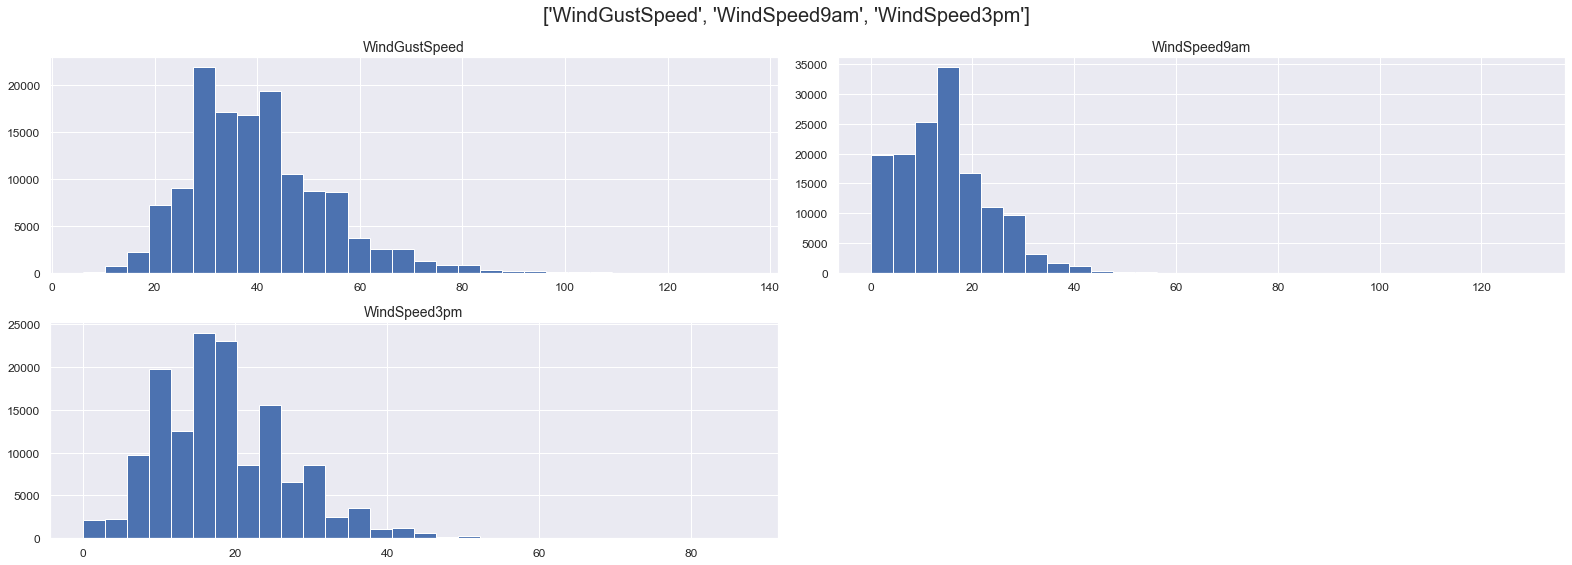

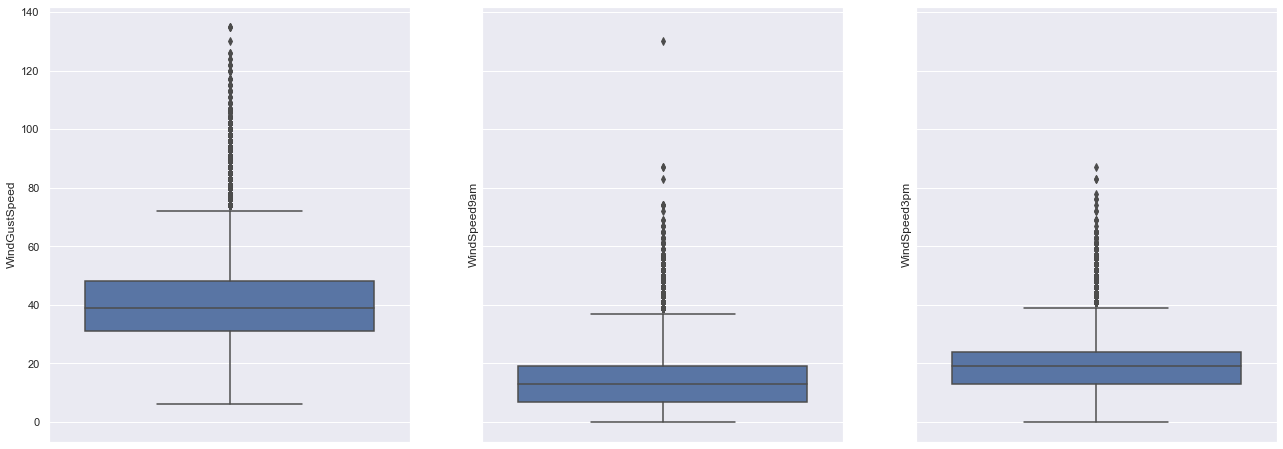

In [13]:
show_histogram(dataset[wind], wind)
show_boxplot(dataset, wind)

**Conclusiones:** Las velocidades del viento presentan distribuciones con oblicuidades y largas colas hacia valores altos debido a la gran cantidad de outliers que presentan.

#### Evaporacion

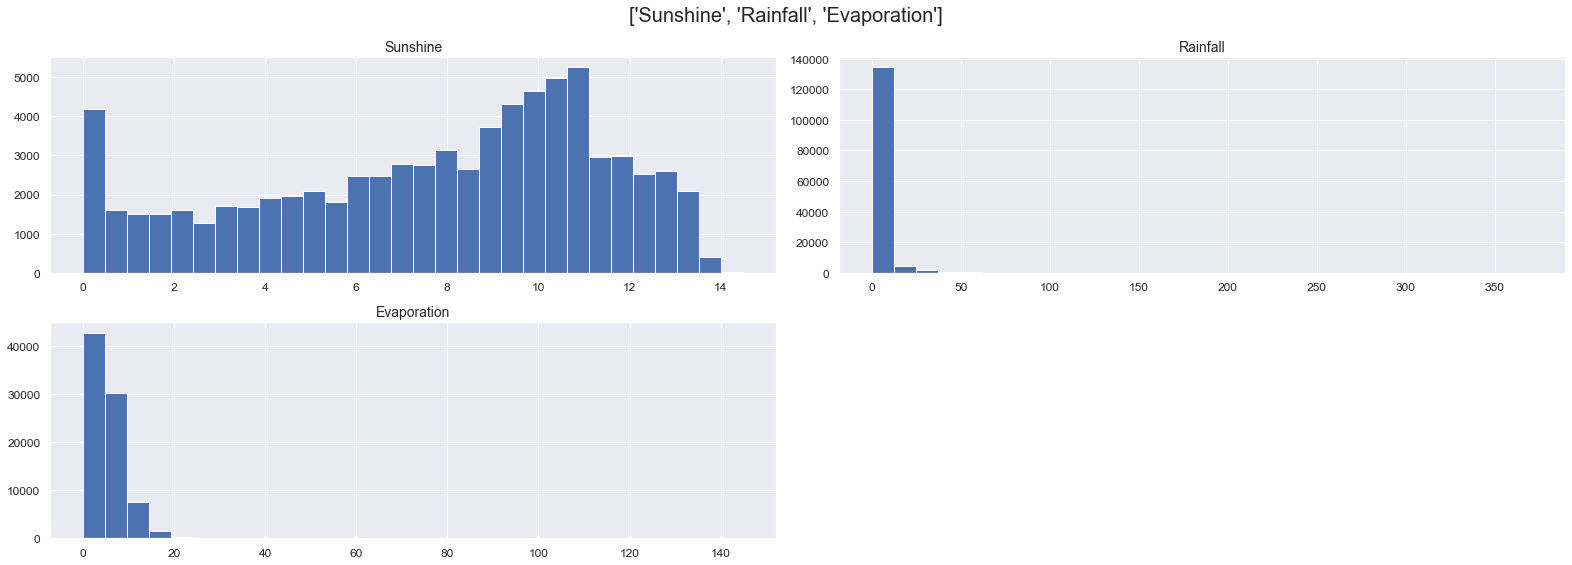

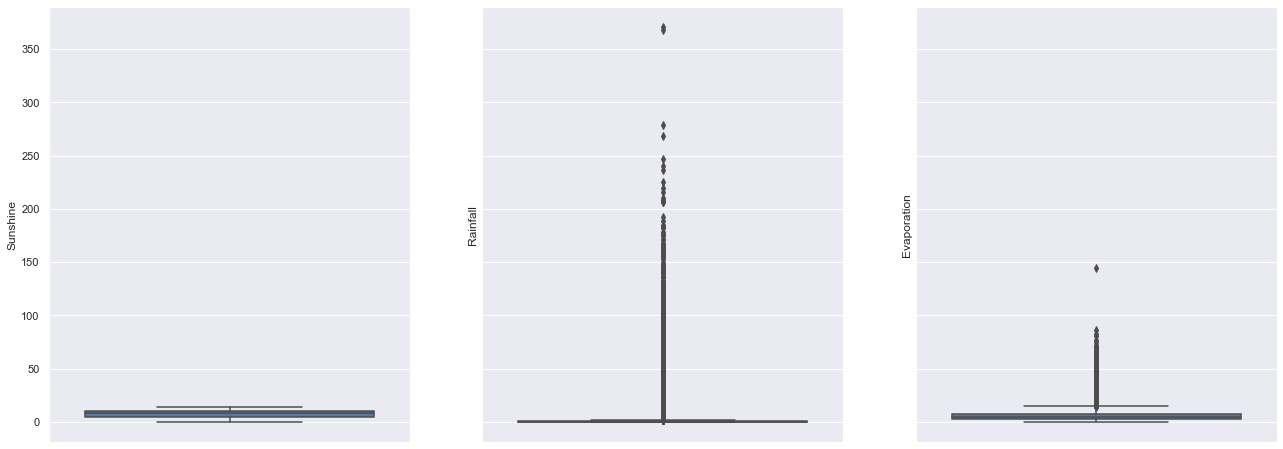

In [14]:
show_histogram(dataset[other], other)
show_boxplot(dataset, other)

**Conclusiones:** Las horas de sol presenta una distribución muy distinta a una distribucion normal, lo cual en una primera instancia hay que tenerlo en cuenta para analizar una transofrmacion de Box-Cox o Yeo-Johnson, al igual que las distribuciones de evaporación y lluvia que su distribución se asemeja a una logaritmica.

#### Matriz de correlación

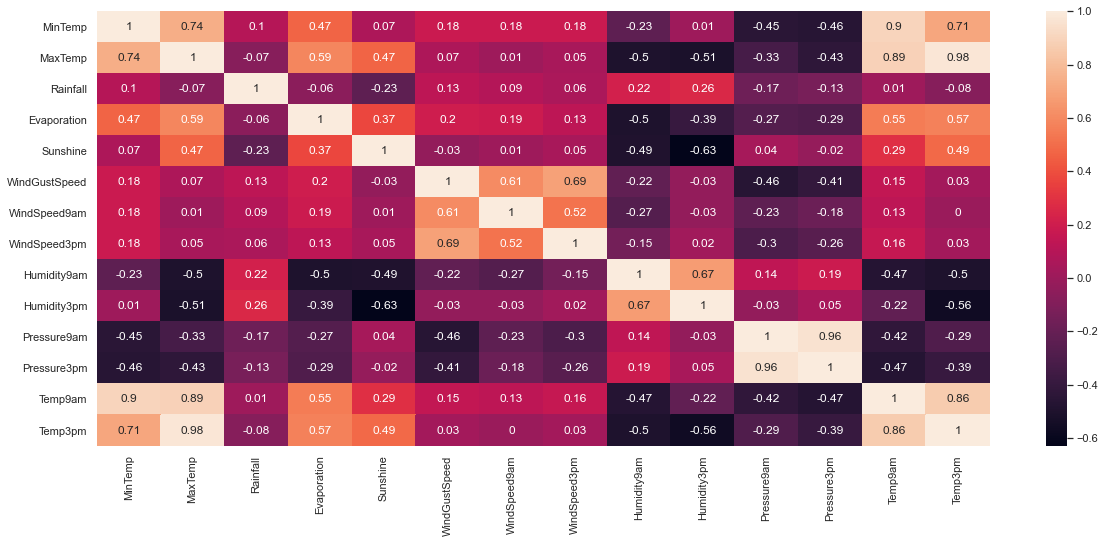

In [15]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = dataset[numericas].corr(method='pearson').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

De la matriz de correlaciones por el método de Pearson podemos obtener algunas relaciones interesantes que valen la pena remarcar que se enumeran a continuación:
- La temperatura mínima está correlacionada con la temperatura a las 9 am.
- La temperatura máxima está correlacionada con la temperatura a las 3 pm.
- Hay una obvia relación entre temperatura mínima y máxima.
- La evaporación está correlacionada con la temperatura máxima de manera positiva mientras que con la humedad de manera negativa.
- Las horas de sol tiene una relación negativa con la humedad.
- Las temperatura tiene relaciones negativas con la humedad y las presiones medidas a las 9 am y a las 3 pm.

Estas relaciones mostradas desde la correlación, responden a relaciones lineales por el método utilizado.

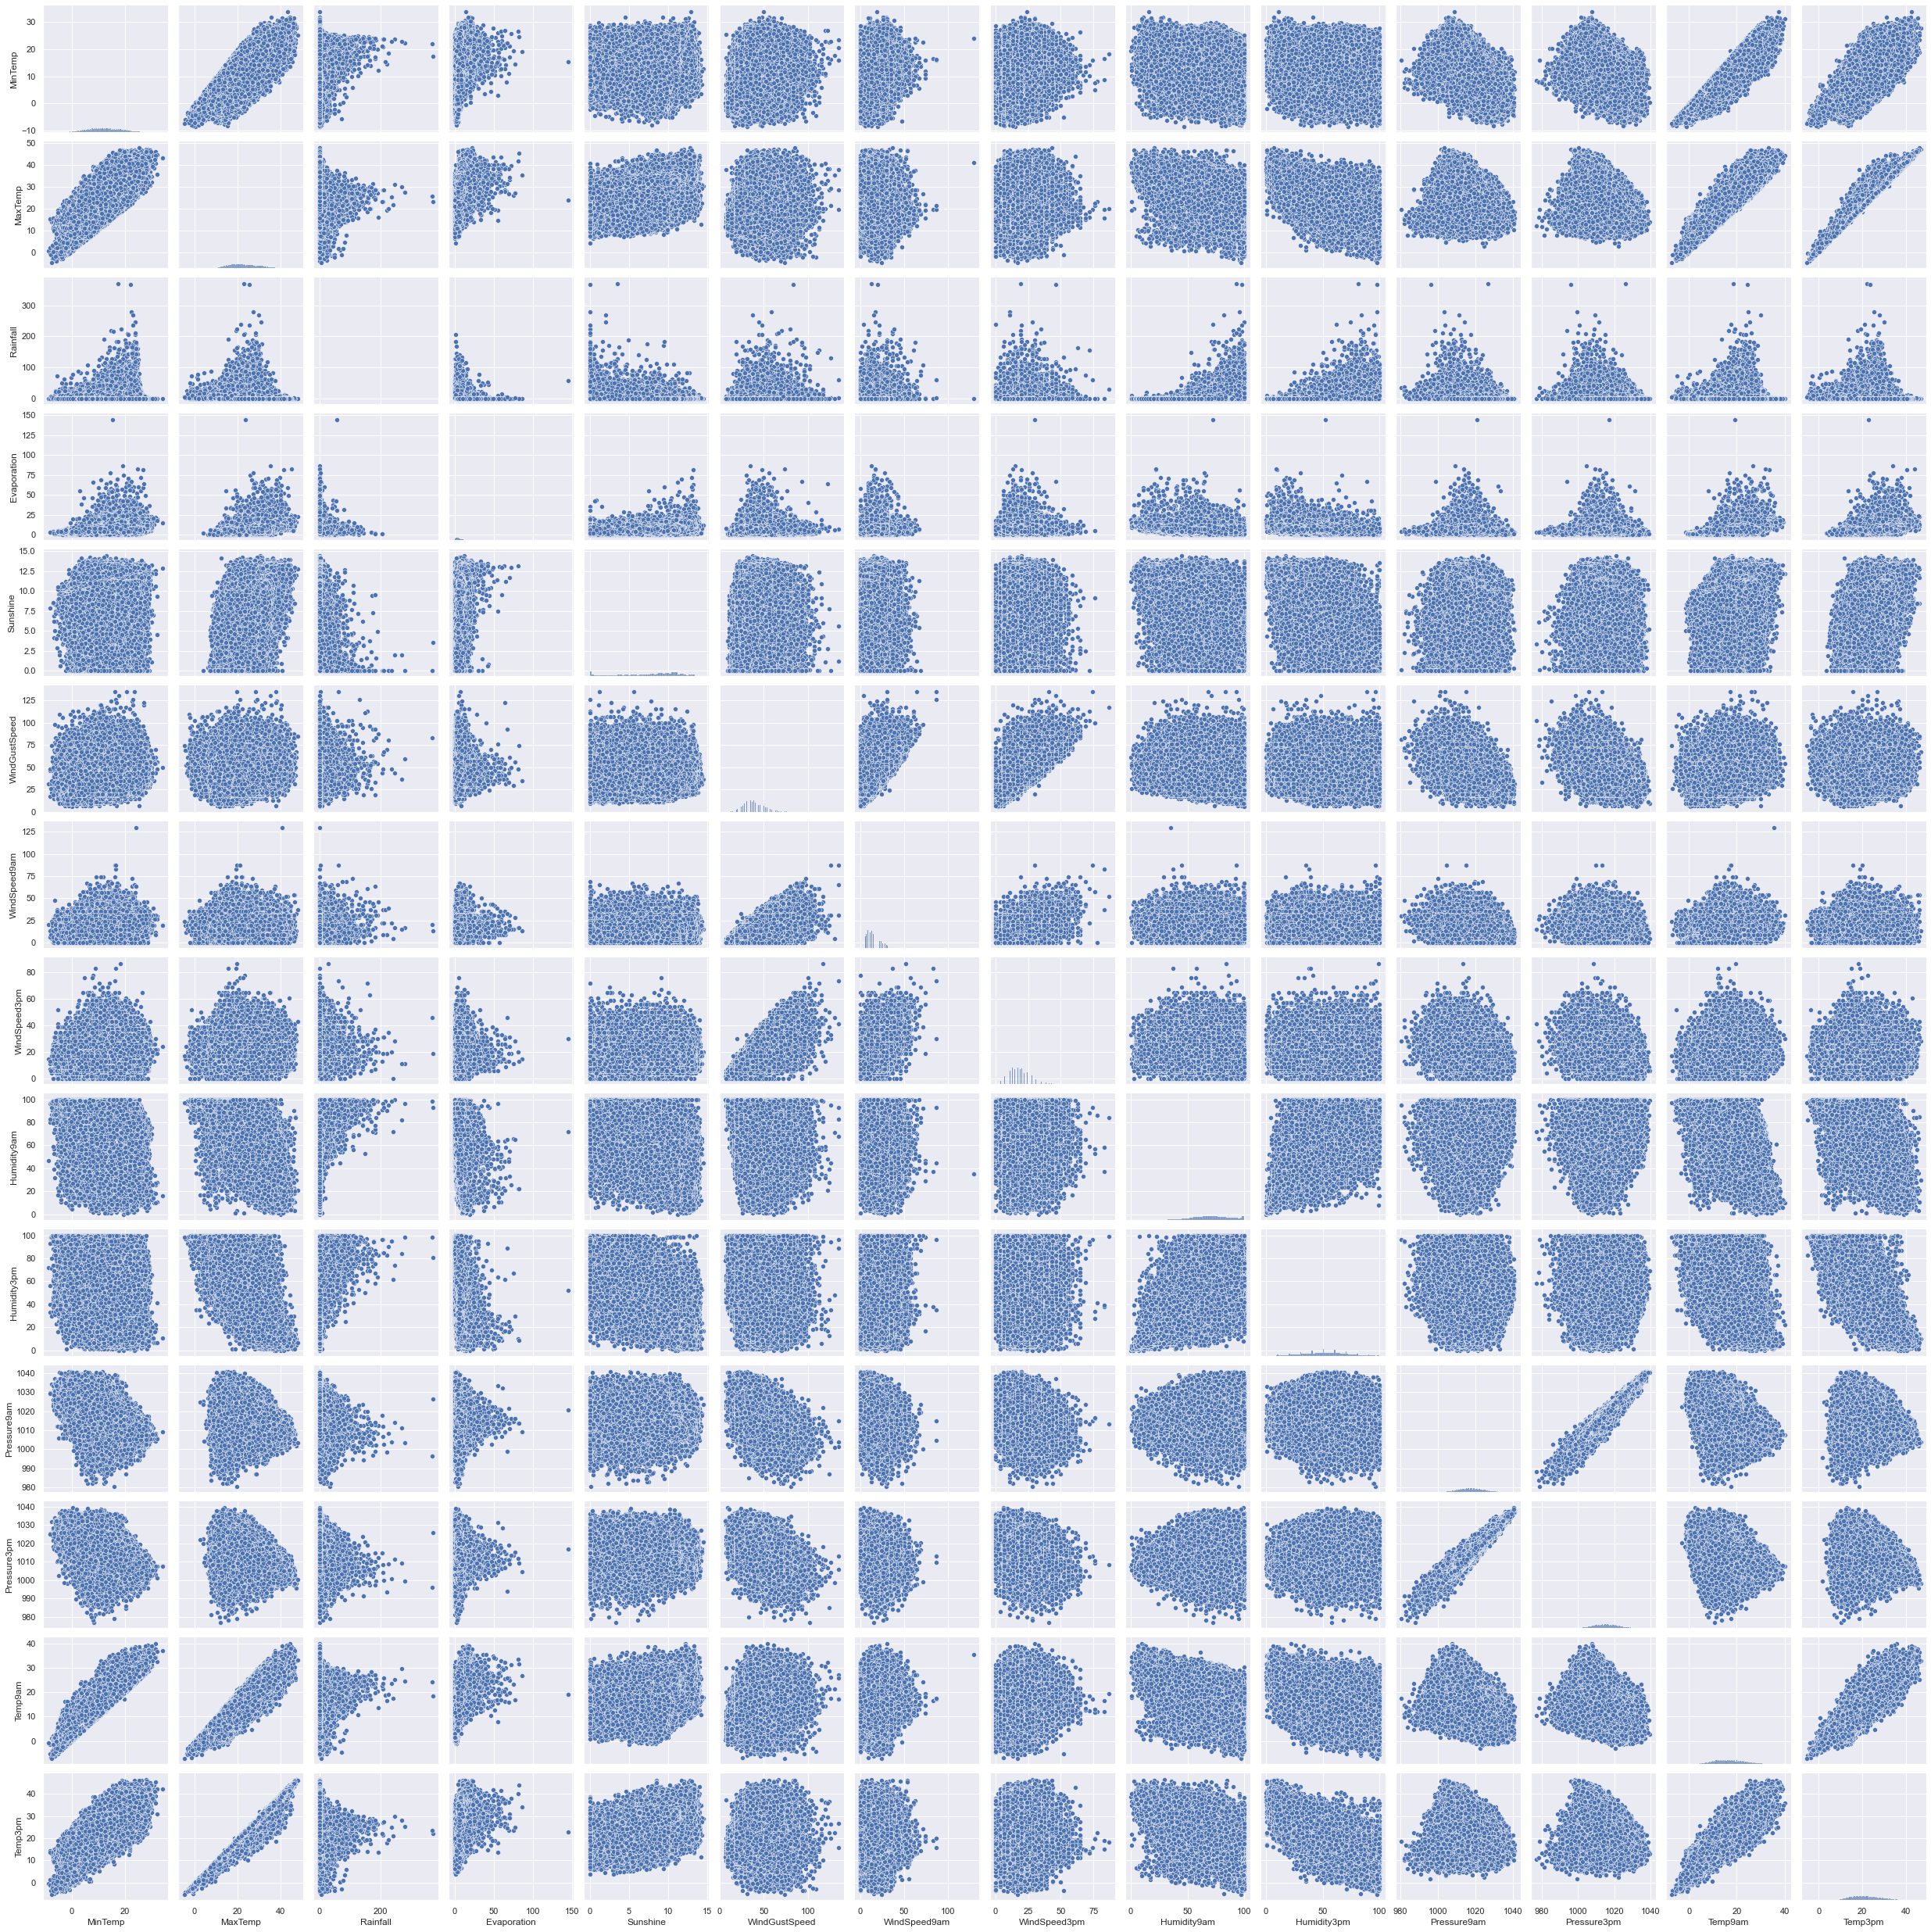

In [16]:
sns.pairplot(dataset[numericas])

#### Análisis de variables categóricas
Se analizarán las variables categóricas y su cardinalidad. A partir de los resultados hallados se propondrán distintas modificaciones en los features.

In [17]:
dataset[categoricas].head(5)

Location WindGustDir WindDir9am WindDir3pm  Cloud9am  Cloud3pm RainToday
0   Albury           W          W        WNW       8.0       NaN        No
1   Albury         WNW        NNW        WSW       NaN       NaN        No
2   Albury         WSW          W        WSW       NaN       2.0        No
3   Albury          NE         SE          E       NaN       NaN        No
4   Albury           W        ENE         NW       7.0       8.0        No

A continuacion se indican la cardinalidad de cada una de estas features:

In [18]:
dataset[categoricas].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
Cloud9am       10
Cloud3pm       10
RainToday       2
dtype: int64

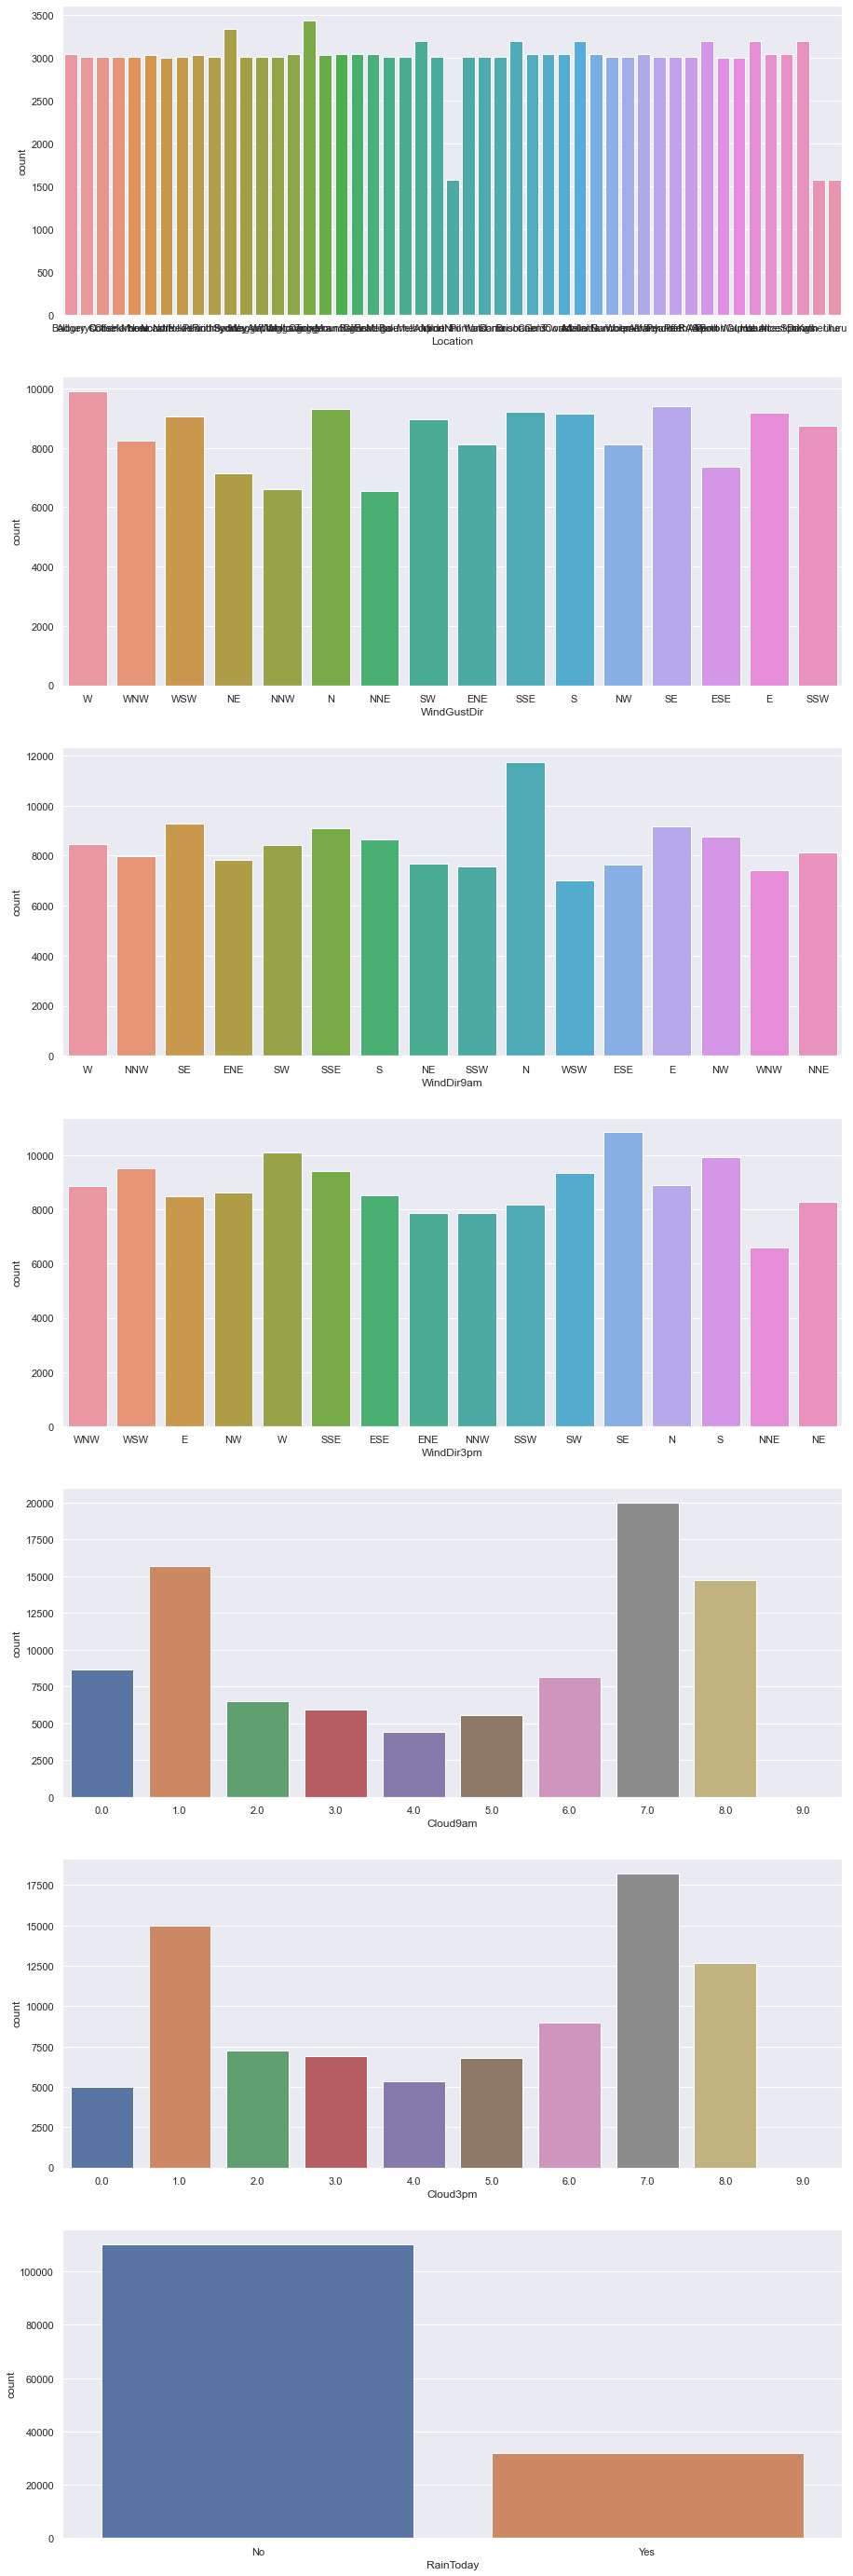

In [19]:
fig,axes = plt.subplots(len(categoricas),1,figsize=(15,50))
for i,feature in enumerate(categoricas):
    sns.countplot(x=feature, data=dataset,ax=axes[i])
    

In [20]:
print("Porcentaje de las cantidades de datos Si/No del feature RainToday:")
print(f"Porcentaje de Yes: {np.sum(dataset['RainToday'] == 'Yes')*100/dataset['RainToday'].count()}%")
print(f"Porcentaje de No: {np.sum(dataset['RainToday'] == 'No')*100/dataset['RainToday'].count()}%")

Porcentaje de las cantidades de datos Si/No del feature RainToday:
Porcentaje de Yes: 22.419285648984875%
Porcentaje de No: 77.58071435101513%


**Conclusiones:** de las graficas anteriores se puede concluir que:
- La variable de Location esta bastante bien balanceada con excepción de tres ciudades que poseen menor cantidad de datos. Esta tambien presenta una cantidad mucho mayor de etiquetas que el resto, lo que empeora la relación señal/ruido y puede generar algunos problemas a la hora de entrenar nuestro modelo como overfitting.**Se propone para estas variables utilizar Label Encoding**
- Las features de direccion de viento se encuentran bien balanceadas en 16 valores que indican los puntos cardinales por lo que no presenta etiquetas pocos frecuentes. **Se propone para estas variables codificarlas en grados segun la coordenada**
- La medición de cielo cubierto presenta una distribución bimodal con 8 etiquetas, debido a su medición en oktas. **En principio al contar con valores discretos y numericos que hacen referencia al porcentaje de cielo cubierto no haria falta codificarla.**
- Finalmente tenemos la feature de si llovió el día en cuestión que se encuentra desbalanceada lo cual es un punto que debemos tener en cuenta. **Se propone para esta variable utilizar una codificacion de One Hot Encoding o Dummy Encodig**

#### Análisis de variables compuestas
Como variable compuesta nos encontramos con la variable de fecha, compuesta por el año, el mes y el día. Analizaremos que variables de año, mes y día conviene mantener.

In [21]:
data_date = dataset.copy()
data_date['day'] = pd.DatetimeIndex(dataset['Date']).day
data_date['month'] = pd.DatetimeIndex(dataset['Date']).month
data_date['year'] = pd.DatetimeIndex(dataset['Date']).year

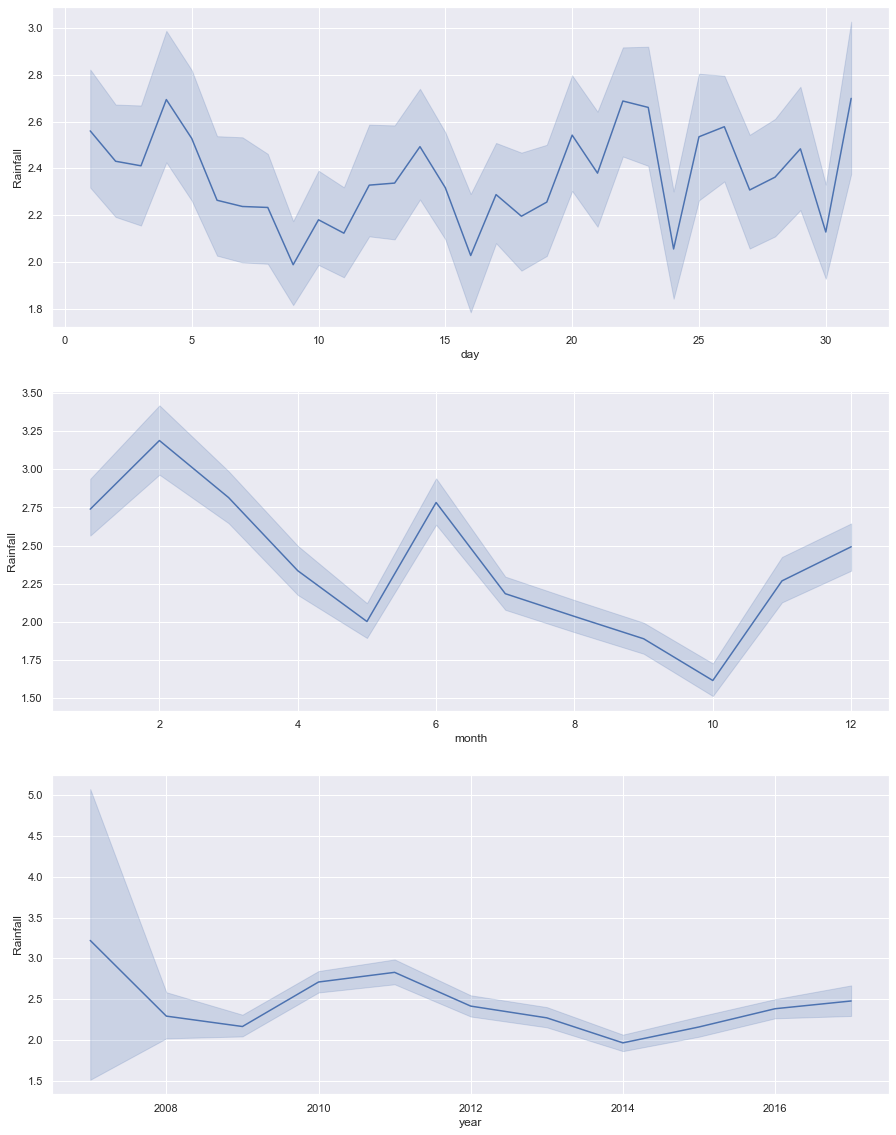

In [22]:
fig,axes = plt.subplots(3,1,figsize=(15,20))
for i,feature in enumerate(['day', 'month', 'year']):
    sns.lineplot(data=data_date, x=feature, y="Rainfall",ax=axes[i])

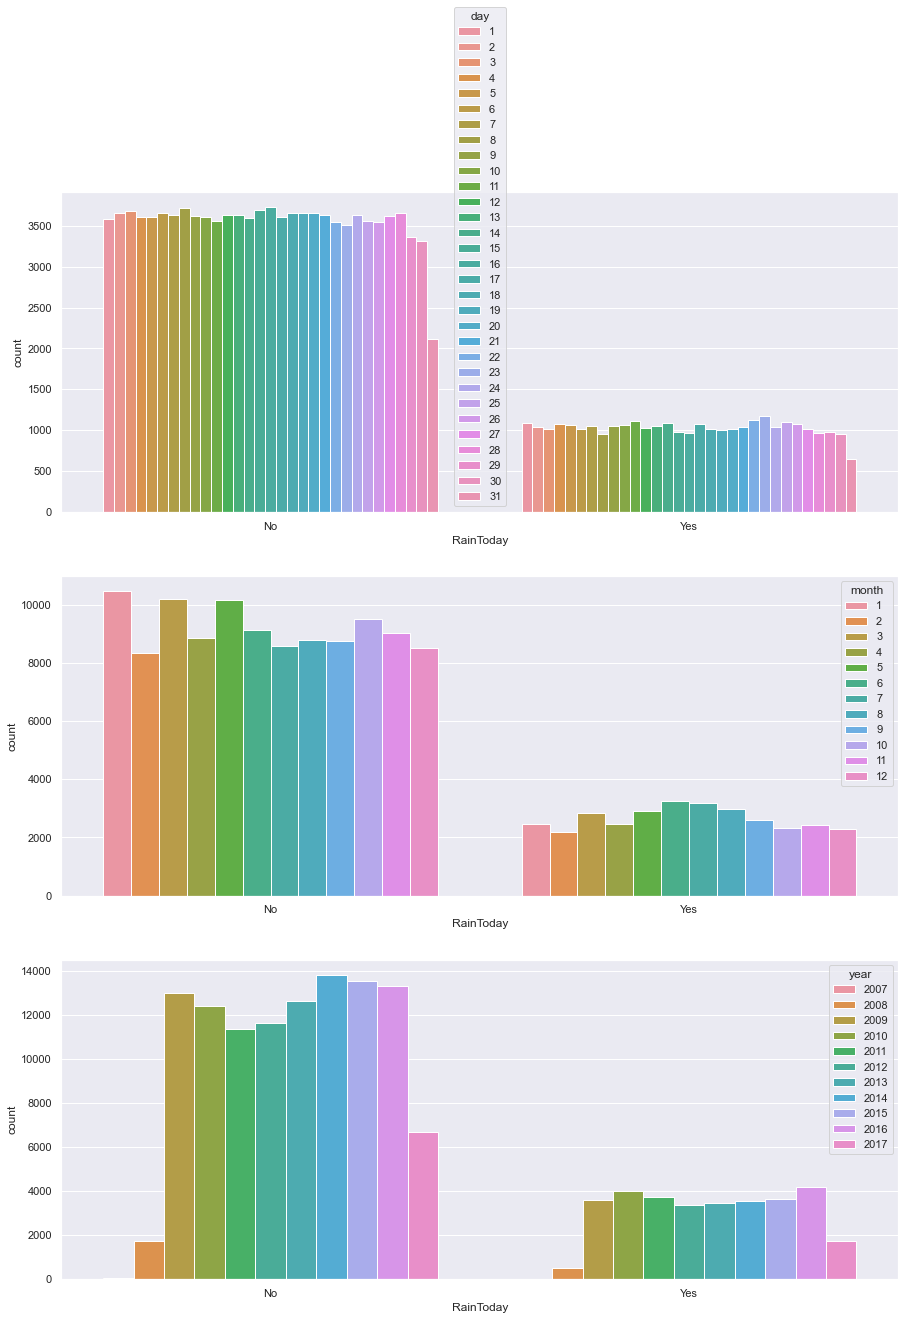

In [23]:
fig,axes = plt.subplots(3,1,figsize=(15,20))
for i,feature in enumerate(['day', 'month', 'year']):
    sns.countplot(x="RainToday", hue=feature, data=data_date,ax=axes[i])

**Conclusiones:** como nuestro objetivo es predecir la posibilidad de que llueva el día siguiente, centraremos la información de la fecha en el dato del mes. Esto es debido a que el año en sí, no me genera un aporte sustancial a la posibilidad de que llueva en un determinado día y tampoco lo hace el día del mes en que llovió. Por otro lado, el dato del mes como podemos observar me da una noción de las épocas más lluviosas, lo cual puede resultar un dato de gran importancia para el modelo

#### Análisis de variables de salida
La variable de salida es la denominada "RainTomorrow" la cual categorica, codificada de manera booleana Si/No si llovio o no.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

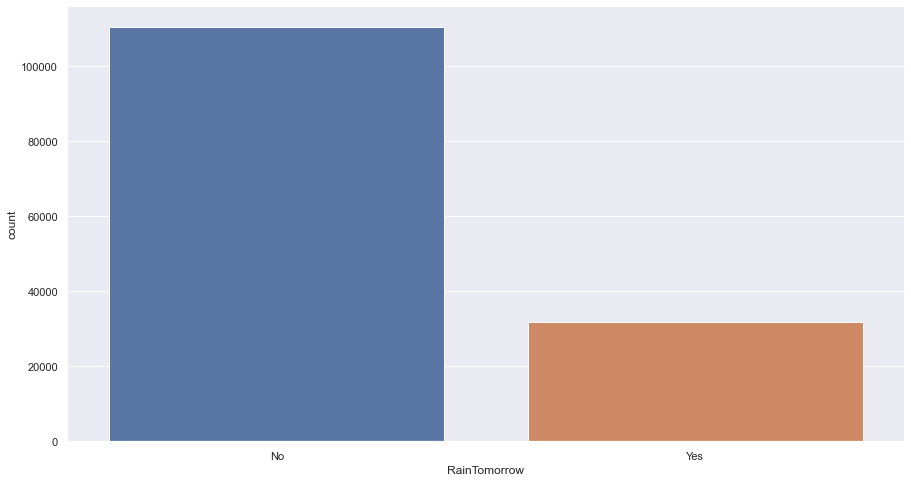

In [24]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='RainTomorrow', data=dataset,ax=axes)

In [25]:
print("Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:")
print(f"Porcentaje de Yes: {np.sum(dataset['RainTomorrow'] == 'Yes')*100/dataset['RainTomorrow'].count()}%")
print(f"Porcentaje de No: {np.sum(dataset['RainTomorrow'] == 'No')*100/dataset['RainTomorrow'].count()}%")

Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:
Porcentaje de Yes: 22.418121848473554%
Porcentaje de No: 77.58187815152645%


**Conclusiones:** Al igual que lo visto en la feature de RainToday esta variable de salida se encuentra totalmente desbalanceada. Para esta variable de salida utilizaria One Hot Encoding o dummy encodig los valores 'Yes' se reemplazarán por 1 y los valores 'No' se reemplazará por 0.

## 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

In [26]:
# Eliminacion de muestras sin valor de salida
data_weather = dataset.dropna(subset=['RainTomorrow'], inplace=False)

In [27]:
# Partición de train-test set. SE QUITAN LOS FEATURES 'Sunshine', 'Evaporation', 'Cloud3pm' y 'Cloud9am':
from sklearn.model_selection import train_test_split

# Modifico la feature Date
data_weatherAUS = data_weather.copy()
#data_weatherAUS['Day'] = pd.DatetimeIndex(data_weather['Date']).day
data_weatherAUS['Month'] = pd.DatetimeIndex(data_weather['Date']).month
#data_weatherAUS['Year'] = pd.DatetimeIndex(data_weather['Date']).year
data_weatherAUS.drop(['Date'], axis=1,inplace=True)

features = ['Month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', \
            'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', \
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

x_train, x_test, y_train, y_test = train_test_split(
    data_weatherAUS[features], 
    data_weatherAUS['RainTomorrow'],  
    test_size=0.3,
    random_state=42)

A continuacion se verifica que los set de entrenamiento y test mantengan proporciones similares en cantidad de datos nulos y proporcion de variables que se habian encontrado desproporcionadas.

#### Set de entrenamiento

In [28]:
x_train.describe()

Month       MinTemp       MaxTemp      Rainfall  WindGustSpeed  \
count  99535.000000  99075.000000  99300.000000  98501.000000   93093.000000   
mean       6.401658     12.174983     23.219216      2.339207      39.961297   
std        3.425424      6.403015      7.118799      8.418217      13.572859   
min        1.000000     -8.200000     -4.800000      0.000000       6.000000   
25%        3.000000      7.600000     17.900000      0.000000      31.000000   
50%        6.000000     12.000000     22.600000      0.000000      39.000000   
75%        9.000000     16.800000     28.200000      0.800000      48.000000   
max       12.000000     33.900000     48.100000    371.000000     135.000000   

       WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am  \
count  98609.000000  97702.000000  98304.000000  96992.000000  89710.000000   
mean      13.991887     18.627787     68.854523     51.485813   1017.656125   
std        8.893245      8.789109     19.065194     20.816642      7.105493   
min        0.000000      0.000000      0.000000      0.000000    980.500000   
25%        7.000000     13.000000     57.000000     37.000000   1013.000000   
50%       13.000000     19.000000     70.000000     52.000000   1017.600000   
75%       19.000000     24.000000     83.000000     66.000000   1022.400000   
max      130.000000     83.000000    100.000000    100.000000   1041.000000   

        Pressure3pm       Temp9am       Temp3pm  
count  89733.000000  98908.000000  97614.000000  
mean    1015.265737     16.977790     21.679544  
std        7.031277      6.492127      6.939894  
min      978.200000     -7.200000     -5.400000  
25%     1010.500000     12.300000     16.600000  
50%     1015.200000     16.700000     21.100000  
75%     1020.000000     21.600000     26.400000  
max     1038.500000     40.200000     46.700000

In [29]:
print("Porcentaje de las cantidades de datos Si/No del feature RainToday:")
print(f"Porcentaje de Yes: {np.sum(x_train['RainToday'] == 'Yes')*100/x_train['RainToday'].count()}%")
print(f"Porcentaje de No: {np.sum(x_train['RainToday'] == 'No')*100/x_train['RainToday'].count()}%")

Porcentaje de las cantidades de datos Si/No del feature RainToday:
Porcentaje de Yes: 22.41804651729424%
Porcentaje de No: 77.58195348270576%


In [30]:
print("Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:")
print(f"Porcentaje de Yes: {np.sum(y_train == 'Yes')*100/y_train.count()} %")
print(f"Porcentaje de No: {np.sum(y_train == 'No')*100/y_train.count()} %")

Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:
Porcentaje de Yes: 22.456422363992566 %
Porcentaje de No: 77.54357763600744 %


In [31]:
cant_null_train, porc_null_train = calc_null(x_train)
orden_train =  np.argsort(porc_null_train)[::-1]

print("Datos Faltantes:")
for i in range(len(orden_train)):
    if cant_null_train[orden_train[i]] != 0:
        print(f"{x_train.columns[orden_train[i]]}:\tDatos NaN: {cant_null_train[orden_train[i]]}\tEn%: {porc_null_train[orden_train[i]]}")

Datos Faltantes:
Pressure9am:	Datos NaN: 9825	En%: 9.870899683528407
Pressure3pm:	Datos NaN: 9802	En%: 9.847792233887578
WindDir9am:	Datos NaN: 7018	En%: 7.05078615562365
WindGustDir:	Datos NaN: 6489	En%: 6.519314813884563
WindGustSpeed:	Datos NaN: 6442	En%: 6.472095242879389
WindDir3pm:	Datos NaN: 2634	En%: 2.646305319736776
Humidity3pm:	Datos NaN: 2543	En%: 2.554880192896971
Temp3pm:	Datos NaN: 1921	En%: 1.9299743808710503
WindSpeed3pm:	Datos NaN: 1833	En%: 1.8415632692017883
Humidity9am:	Datos NaN: 1231	En%: 1.2367508916461547
Rainfall:	Datos NaN: 1034	En%: 1.0388305621138294
RainToday:	Datos NaN: 1034	En%: 1.0388305621138294
WindSpeed9am:	Datos NaN: 926	En%: 0.9303260159742804
Temp9am:	Datos NaN: 627	En%: 0.6299291706434922
MinTemp:	Datos NaN: 460	En%: 0.46214899281659716
MaxTemp:	Datos NaN: 235	En%: 0.2360978550258703


In [32]:
print(f"Cantidad de datos Nan en mi salida: {sum(y_train.isnull())}")

Cantidad de datos Nan en mi salida: 0


#### Set de test

In [33]:
x_test.describe()

Month       MinTemp       MaxTemp      Rainfall  WindGustSpeed  \
count  42658.000000  42481.000000  42571.000000  42286.000000   39830.000000   
mean       6.404613     12.213027     23.244439      2.375056      40.038037   
std        3.429067      6.403902      7.114916      8.573603      13.626007   
min        1.000000     -8.500000     -3.800000      0.000000       7.000000   
25%        3.000000      7.600000     18.000000      0.000000      31.000000   
50%        6.000000     12.000000     22.600000      0.000000      39.000000   
75%        9.000000     16.900000     28.300000      0.600000      48.000000   
max       12.000000     31.900000     47.000000    278.400000     135.000000   

       WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am  \
count  42236.000000  41861.000000  42115.000000  41591.000000  38469.000000   
mean      14.025571     18.660424     68.818806     51.475127   1017.648239   
std        8.893613      8.836544     19.019007     20.753946      7.105524   
min        0.000000      0.000000      1.000000      0.000000    982.900000   
25%        7.000000     13.000000     57.000000     37.000000   1012.900000   
50%       13.000000     19.000000     70.000000     52.000000   1017.600000   
75%       19.000000     24.000000     83.000000     66.000000   1022.400000   
max       87.000000     87.000000    100.000000    100.000000   1040.900000   

        Pressure3pm       Temp9am       Temp3pm  
count  38479.000000  42381.000000  41853.000000  
mean    1015.240635     17.010189     21.705173  
std        7.049312      6.494518      6.932276  
min      977.100000     -5.900000     -5.100000  
25%     1010.400000     12.300000     16.600000  
50%     1015.200000     16.700000     21.100000  
75%     1020.000000     21.600000     26.500000  
max     1039.600000     38.900000     46.100000

In [34]:
print("Porcentaje de las cantidades de datos Si/No del feature RainToday:")
print(f"Porcentaje de Yes: {np.sum(x_test['RainToday'] == 'Yes')*100/x_test['RainToday'].count()} %")
print(f"Porcentaje de No: {np.sum(x_test['RainToday'] == 'No')*100/x_test['RainToday'].count()} %")

Porcentaje de las cantidades de datos Si/No del feature RainToday:
Porcentaje de Yes: 22.165728609941826 %
Porcentaje de No: 77.83427139005818 %


In [35]:
print("Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:")
print(f"Porcentaje de Yes: {np.sum(y_test == 'Yes')*100/y_test.count()}%")
print(f"Porcentaje de No: {np.sum(y_test == 'No')*100/y_test.count()}%")

Porcentaje de las cantidades de datos Si/No del feature RainTomorrow:
Porcentaje de Yes: 22.328754278212763%
Porcentaje de No: 77.67124572178724%


In [36]:
cant_null_test, porc_null_test = calc_null(x_test)
orden_test =  np.argsort(porc_null_test)[::-1]

print("Datos Faltantes:")
for i in range(len(orden_test)):
    if cant_null_train[orden_test[i]] != 0:
        print(f"{x_test.columns[orden_test[i]]}:\tDatos Nan: {cant_null_test[orden_test[i]]}\tEn%: {porc_null_test[orden_test[i]]}")

Datos Faltantes:
Pressure9am:	Datos Nan: 4189	En%: 9.819963430071732
Pressure3pm:	Datos Nan: 4179	En%: 9.796521168362323
WindDir9am:	Datos Nan: 2995	En%: 7.020957381968213
WindGustDir:	Datos Nan: 2841	En%: 6.659946551643302
WindGustSpeed:	Datos Nan: 2828	En%: 6.62947161142107
WindDir3pm:	Datos Nan: 1144	En%: 2.6817947395564725
Humidity3pm:	Datos Nan: 1067	En%: 2.5012893243940177
Temp3pm:	Datos Nan: 805	En%: 1.8871020676074828
WindSpeed3pm:	Datos Nan: 797	En%: 1.868348258239955
Humidity9am:	Datos Nan: 543	En%: 1.272914810820948
WindSpeed9am:	Datos Nan: 422	En%: 0.9892634441370903
Rainfall:	Datos Nan: 372	En%: 0.8720521355900417
RainToday:	Datos Nan: 372	En%: 0.8720521355900417
Temp9am:	Datos Nan: 277	En%: 0.6493506493506493
MinTemp:	Datos Nan: 177	En%: 0.4149280322565521
MaxTemp:	Datos Nan: 87	En%: 0.2039476768718646


In [37]:
print(f"Cantidad de datos Nan en mi salida: {sum(y_test.isnull())}")

Cantidad de datos Nan en mi salida: 0


## 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

#### Codificación de variables categóricas
Codificaremos algunas variables categóricas por una representación numérica.
* 'Location': Label/integer encoding, se codifican las 49 ciudades numéricamente con valores de 0 a 48
* 'WindGustDir','WindDir9am' y 'WindDir3pm': se codifica de la siguiente manera para que queden valores entre 0 y 1 y mantener la continuidad de la coordenada cardinal.
    - E    -> (sin(0°)+1)/2
    - ENE  -> (sin(22.5°)+1)/2
    - NE   -> (sin(45°)+1)/2
    - NNE  -> (sin(67.5°)+1)/2
    - N    -> (sin(90°)+1)/2
    - NNW  -> (sin(112.5°)+1)/2
    - NW   -> (sin(135°)+1)/2
    - WNW  -> (sin(157.5°)+1)/2
    - W    -> (sin(180°)+1)/2
    - WSW  -> (sin(202.5°)+1)/2
    - SW   -> (sin(225°)+1)/2
    - SSW  -> (sin(247.5°)+1)/2
    - S    -> (sin(270°)+1)/2
    - SSE  -> (sin(292.5°)+1)/2
    - SE   -> (sin(315°)+1)/2
    - ESE  -> (sin(337.5°)+1)/2
* 'RainToday' y 'RainTomorrow': One Hot Encoding - Se reemplazará el valor 'Yes' por '1' y el valor 'No' por '0

In [38]:
def categoric_features(x_train, x_test, y_train, y_test):
    # One Hot Encoding RainToday y RainTomorrow
    x_train['RainToday'] = x_train['RainToday'].replace({'No':0, 'Yes':1})
    y_train = y_train.replace({'No':0, 'Yes':1})

    x_test['RainToday'] = x_test['RainToday'].replace({'No':0, 'Yes':1})
    y_test = y_test.replace({'No':0, 'Yes':1})

    # Codificacion direccion del viento
    wind_dir = {'E':(np.sin(0)+1)/2, 'ENE': (np.sin(22.5*np.pi/180)+1)/2,
                'NE': (np.sin(45*np.pi/180)+1)/2, 'NNE':(np.sin(67.5*np.pi/180)+1)/2,
                'N': (np.sin(90*np.pi/180)+1)/2, 'NNW': (np.sin(112.5*np.pi/180)+1)/2,
                'NW': (np.sin(135*np.pi/180)+1)/2, 'WNW': (np.sin(157.5*np.pi/180)+1)/2,
                'W': (np.sin(180*np.pi/180)+1)/2, 'WSW': (np.sin(202.5*np.pi/180)+1)/2,
                'SW': (np.sin(225*np.pi/180)+1)/2, 'SSW': (np.sin(247.5*np.pi/180)+1)/2,
                'S': (np.sin(270*np.pi/180)+1)/2, 'SSE': (np.sin(292.5*np.pi/180)+1)/2,
                'SE': (np.sin(315*np.pi/180)+1)/2, 'ESE': (np.sin(337.5*np.pi/180)+1)/2}
    
    x_train['WindGustDir'] = x_train['WindGustDir'].replace(wind_dir)
    x_train['WindDir9am'] = x_train['WindDir9am'].replace(wind_dir)
    x_train['WindDir3pm'] = x_train['WindDir3pm'].replace(wind_dir)

    x_test['WindGustDir'] = x_test['WindGustDir'].replace(wind_dir)
    x_test['WindDir9am'] = x_test['WindDir9am'].replace(wind_dir)
    x_test['WindDir3pm'] = x_test['WindDir3pm'].replace(wind_dir)

    # Codificacion ciudades
    city = {}
    for code,ciudad in enumerate(x_train['Location'].unique()):
        city[ciudad] = code
    x_train['Location'] = x_train['Location'].replace(city)
    x_test['Location'] = x_test['Location'].replace(city)
    
    return x_train, x_test, y_train, y_test

In [39]:
x_train, x_test, y_train, y_test = categoric_features(x_train, x_test, y_train, y_test)

In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99535 entries, 121033 to 124925
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          99535 non-null  int64  
 1   Location       99535 non-null  int64  
 2   MinTemp        99075 non-null  float64
 3   MaxTemp        99300 non-null  float64
 4   Rainfall       98501 non-null  float64
 5   WindGustDir    93046 non-null  float64
 6   WindGustSpeed  93093 non-null  float64
 7   WindDir9am     92517 non-null  float64
 8   WindDir3pm     96901 non-null  float64
 9   WindSpeed9am   98609 non-null  float64
 10  WindSpeed3pm   97702 non-null  float64
 11  Humidity9am    98304 non-null  float64
 12  Humidity3pm    96992 non-null  float64
 13  Pressure9am    89710 non-null  float64
 14  Pressure3pm    89733 non-null  float64
 15  Temp9am        98908 non-null  float64
 16  Temp3pm        97614 non-null  float64
 17  RainToday      98501 non-null  float64
dtype

In [41]:
x_train.describe()

Month      Location       MinTemp       MaxTemp      Rainfall  \
count  99535.000000  99535.000000  99075.000000  99300.000000  98501.000000   
mean       6.401658     23.386397     12.174983     23.219216      2.339207   
std        3.425424     14.021829      6.403015      7.118799      8.418217   
min        1.000000      0.000000     -8.200000     -4.800000      0.000000   
25%        3.000000     11.000000      7.600000     17.900000      0.000000   
50%        6.000000     23.000000     12.000000     22.600000      0.000000   
75%        9.000000     36.000000     16.800000     28.200000      0.800000   
max       12.000000     48.000000     33.900000     48.100000    371.000000   

        WindGustDir  WindGustSpeed    WindDir9am    WindDir3pm  WindSpeed9am  \
count  93046.000000   93093.000000  92517.000000  96901.000000  98609.000000   
mean       0.475110      39.961297      0.505743      0.475785     13.991887   
std        0.349718      13.572859      0.360022      0.350100      8.893245   
min        0.000000       6.000000      0.000000      0.000000      0.000000   
25%        0.146447      31.000000      0.146447      0.146447      7.000000   
50%        0.500000      39.000000      0.500000      0.500000     13.000000   
75%        0.853553      48.000000      0.853553      0.853553     19.000000   
max        1.000000     135.000000      1.000000      1.000000    130.000000   

       WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  \
count  97702.000000  98304.000000  96992.000000  89710.000000  89733.000000   
mean      18.627787     68.854523     51.485813   1017.656125   1015.265737   
std        8.789109     19.065194     20.816642      7.105493      7.031277   
min        0.000000      0.000000      0.000000    980.500000    978.200000   
25%       13.000000     57.000000     37.000000   1013.000000   1010.500000   
50%       19.000000     70.000000     52.000000   1017.600000   1015.200000   
75%       24.000000     83.000000     66.000000   1022.400000   1020.000000   
max       83.000000    100.000000    100.000000   1041.000000   1038.500000   

            Temp9am       Temp3pm     RainToday  
count  98908.000000  97614.000000  98501.000000  
mean      16.977790     21.679544      0.224180  
std        6.492127      6.939894      0.417044  
min       -7.200000     -5.400000      0.000000  
25%       12.300000     16.600000      0.000000  
50%       16.700000     21.100000      0.000000  
75%       21.600000     26.400000      0.000000  
max       40.200000     46.700000      1.000000

#### Valores NaN

In [42]:
print(f"Cantidad de muestras: {dataset.shape[0]}")
for i in range(len(orden)):
    print(f"{dataset.columns[orden[i]]}:\tDatos validos: {dataset.shape[0]-cant_null[orden[i]]} \tDatos Nan: {cant_null[orden[i]]} \tEn%: {porc_null[orden[i]]}")

Cantidad de muestras: 145460
Sunshine:	Datos validos: 75625 	Datos Nan: 69835 	En%: 48.00976213391998
Evaporation:	Datos validos: 82670 	Datos Nan: 62790 	En%: 43.1665062560154
Cloud3pm:	Datos validos: 86102 	Datos Nan: 59358 	En%: 40.80709473394748
Cloud9am:	Datos validos: 89572 	Datos Nan: 55888 	En%: 38.42155919153032
Pressure9am:	Datos validos: 130395 	Datos Nan: 15065 	En%: 10.356799120033
Pressure3pm:	Datos validos: 130432 	Datos Nan: 15028 	En%: 10.331362573903478
WindDir9am:	Datos validos: 134894 	Datos Nan: 10566 	En%: 7.263852605527292
WindGustDir:	Datos validos: 135134 	Datos Nan: 10326 	En%: 7.09885879279527
WindGustSpeed:	Datos validos: 135197 	Datos Nan: 10263 	En%: 7.055547916953114
Humidity3pm:	Datos validos: 140953 	Datos Nan: 4507 	En%: 3.09844630826344
WindDir3pm:	Datos validos: 141232 	Datos Nan: 4228 	En%: 2.906641000962464
Temp3pm:	Datos validos: 141851 	Datos Nan: 3609 	En%: 2.4810944589577892
RainTomorrow:	Datos validos: 142193 	Datos Nan: 3267 	En%: 2.245978275

A primera vista hay que notar que hay un 2.25% de las muestras que no poseen datos de salida. Por lo tanto, estas muestras no son de utilidad para el entrenamiento o test de nuestro modelo y deben ser removidas. Esto se realiza antes de la division realizar el split en x_train y x_test del dataset.

Las features **'Sunshine', 'Evaporation', 'Cloud3pm' y 'Cloud9am'** serán excluidas debido a su alto porcenataje de valores NaN.

**ACLARACION**: tanto la eliminacion de las muestras con valores NaN en la salida como la exclusion de los features por alta cantidad de valores no validos fue realizada antes durante el split del dataset en la seccion 2.

Para el resto de las variables trataré de establecer si sus faltantes son del tipo MCAR, MAR o MNAR.


* MCAR: Missing Completely at Random
* MAR: Missing at Random
* MNAR: Missing not at Random

In [43]:
categoricas_clean = ['Location', 'Month', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [44]:
numericas_clean = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',\
                   'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [45]:
features_with_nan = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'MinTemp', 'MaxTemp', \
                     'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', \
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

A continuacion se busca alguna relación entre los datos faltantes y la ciudad a la que pertenece la medicion. Se encuentra que en algunas ciudades hay 100% de valores faltantes de determinada variable, y en otras no, por lo cual para algunas ciudades estos valeres deben clasificarse como MNAR. Mientras que en las que hay menor cantidad de valores faltantes podría clasificarse como MAR.

Por otro lado, no parece haber relación apreciable entre la faltante de un dato y el mes de dicha faltante.

In [46]:
for feature in features_with_nan:
    a = x_train[x_train[feature].isna()].groupby('Location')['Location'].count()*100/x_train.groupby('Location')['Location'].count()
    print(f"Porcentaje maximo de mediciones de {feature} faltantes por localidad: {np.max(a)}%")
    if np.max(a)==100:
        print(a)
    print()

Porcentaje maximo de mediciones de WindGustDir faltantes por localidad: 100.0%
Location
0       0.179292
1       0.196657
2       0.706402
3       3.754439
4     100.000000
5       0.962420
6       0.515706
7       6.207234
8       9.680100
9       0.670498
10      0.387034
11      0.801131
12      1.051123
13      1.177579
14      0.696864
15      0.097229
16      0.535954
17      0.534759
18      0.386660
19      0.803783
20      1.225837
21      0.574713
22      0.815348
23     10.233222
24      1.339713
25     30.938740
26      1.313230
27      2.567976
28      2.267003
29      0.477327
30      0.139018
31      0.189036
32      2.847651
33      4.545455
34      1.766953
35    100.000000
36      1.520913
37      0.580552
38      1.551139
39      0.474834
40      1.097328
41      1.830443
42      1.523297
43      1.708590
44      1.290014
45      4.234063
46      1.795332
47      1.699717
48      0.096200
Name: Location, dtype: float64

Porcentaje maximo de mediciones de WindDir9am f

In [47]:
for feature in features_with_nan:
    a = x_train[x_train[feature].isna()].groupby('Month')['Month'].count()*100/x_train.groupby('Month')['Month'].count()
    print(f"Porcentaje maximo de mediciones de {feature} faltantes por mes: {np.max(a)}%")
    if np.max(a)==100:
        print(a)

Porcentaje maximo de mediciones de WindGustDir faltantes por mes: 7.212990936555891%
Porcentaje maximo de mediciones de WindDir9am faltantes por mes: 11.948381149902062%
Porcentaje maximo de mediciones de WindDir3pm faltantes por mes: 3.952068210623344%
Porcentaje maximo de mediciones de RainToday faltantes por mes: 1.165475536008796%
Porcentaje maximo de mediciones de MinTemp faltantes por mes: 0.702845949994239%
Porcentaje maximo de mediciones de MaxTemp faltantes por mes: 0.36456434560699963%
Porcentaje maximo de mediciones de Rainfall faltantes por mes: 1.165475536008796%
Porcentaje maximo de mediciones de WindGustSpeed faltantes por mes: 7.074521651560927%
Porcentaje maximo de mediciones de WindSpeed9am faltantes por mes: 1.3595166163141994%
Porcentaje maximo de mediciones de WindSpeed3pm faltantes por mes: 2.379154078549849%
Porcentaje maximo de mediciones de Humidity9am faltantes por mes: 1.7077175697865352%
Porcentaje maximo de mediciones de Humidity3pm faltantes por mes: 3.072

#### Caso 1:
Armaremos un dataset eliminando aquellas nuestras que poseen datos faltantes.

In [48]:
data_cca = dataset.dropna(inplace=False)
data_cca.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180     18.513289     20.197040   
min         9.000000      2.000000      2.000000      0.000000      0.000000   
25%        31.000000      9.000000     13.000000     55.000000     35.000000   
50%        39.000000     15.000000     19.000000     67.000000     50.000000   
75%        48.000000     20.000000     26.000000     79.000000     63.000000   
max       124.000000     67.000000     76.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean    1017.239505   1014.795580      4.241705      4.326515     18.204961   
std        6.909357      6.870892      2.797162      2.647251      6.567991   
min      980.500000    977.100000      0.000000      0.000000     -0.700000   
25%     1012.700000   1010.100000      1.000000      2.000000     13.100000   
50%     1017.200000   1014.700000      5.000000      5.000000     17.800000   
75%     1021.800000   1019.400000      7.000000      7.000000     23.300000   
max     1040.400000   1038.900000      8.000000      9.000000     39.400000   

            Temp3pm  
count  56420.000000  
mean      22.710333  
std        6.836543  
min        3.700000  
25%       17.400000  
50%       22.400000  
75%       27.900000  
max       46.100000

In [49]:
data_cca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [50]:
print(f"En este caso nos quedamos con el {data_cca.shape[0]*100/dataset.shape[0]} % del dataset original.")
print(f"Se mantuvieron {data_cca.shape[0]} de las {dataset.shape[0]} muestras")

En este caso nos quedamos con el 38.78729547641964 % del dataset original.
Se mantuvieron 56420 de las 145460 muestras


In [51]:
# Modifico la feature Date
data_weatherAUS_cca = data_cca.copy()
data_weatherAUS_cca['Month'] = pd.DatetimeIndex(data_cca['Date']).month
data_weatherAUS_cca.drop(['Date'], axis=1,inplace=True)

features = ['Month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', \
            'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', \
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

x_train_cca, x_test_cca, y_train_cca, y_test_cca = train_test_split(
    data_weatherAUS_cca[features], 
    data_weatherAUS_cca['RainTomorrow'],  
    test_size=0.3,
    random_state=42)

In [52]:
x_train_cca, x_test_cca, y_train_cca, y_test_cca = categoric_features(x_train_cca, x_test_cca, y_train_cca, y_test_cca)

In [53]:
data_weatherAUS_cca.drop(columns=['Evaporation'], inplace=True)
data_weatherAUS_cca.drop(columns=['Sunshine'], inplace=True)
data_weatherAUS_cca.drop(columns=['Cloud3pm'], inplace=True)
data_weatherAUS_cca.drop(columns=['Cloud9am'], inplace=True)

In [54]:
data_weatherAUS_cca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   WindGustDir    56420 non-null  object 
 5   WindGustSpeed  56420 non-null  float64
 6   WindDir9am     56420 non-null  object 
 7   WindDir3pm     56420 non-null  object 
 8   WindSpeed9am   56420 non-null  float64
 9   WindSpeed3pm   56420 non-null  float64
 10  Humidity9am    56420 non-null  float64
 11  Humidity3pm    56420 non-null  float64
 12  Pressure9am    56420 non-null  float64
 13  Pressure3pm    56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  object 
 17  RainTomorrow   56420 non-null  object 
 18  Mo

In [56]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
x_train_red = sel.fit_transform(x_train_cca);
x_test_red = sel.transform(x_test_cca)

In [57]:
df_train = pd.DataFrame(np.concatenate([x_train_cca,y_train_cca[:,np.newaxis]], axis=1), 
                        columns=data_weatherAUS_cca.columns[np.concatenate([sel.get_support(), [True]])])

<ipython-input-57-002cee2bee81>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train = pd.DataFrame(np.concatenate([x_train_cca,y_train_cca[:,np.newaxis]], axis=1),


In [58]:
from sklearn.feature_selection import mutual_info_regression
r = df_train.corr(method='pearson')
MI = mutual_info_regression(x_train_cca, y_train_cca)

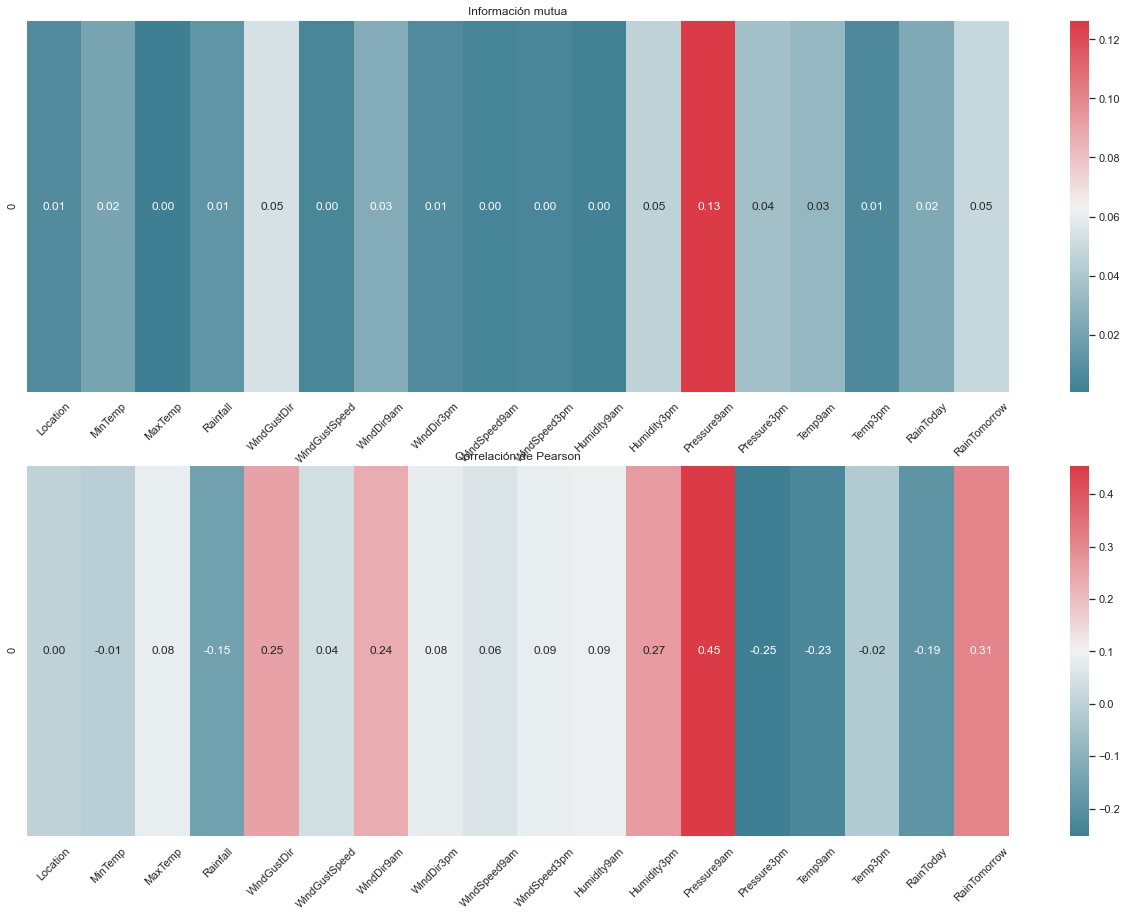

In [59]:
fig, ax = plt.subplots(2,1, figsize=(22,15))
ax[0].set_title('Información mutua')
sns.heatmap([MI],ax=ax[0],cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax[0].set_xticklabels(df_train.columns.values[:-1])

ax[1].set_title('Correlación de Pearson')
sns.heatmap([r.iloc[-1][:-1]],cmap=sns.diverging_palette(220,10,as_cmap=True),ax=ax[1], annot=True,fmt=".2f")
ax[1].set_xticklabels(df_train.columns.values[:-1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

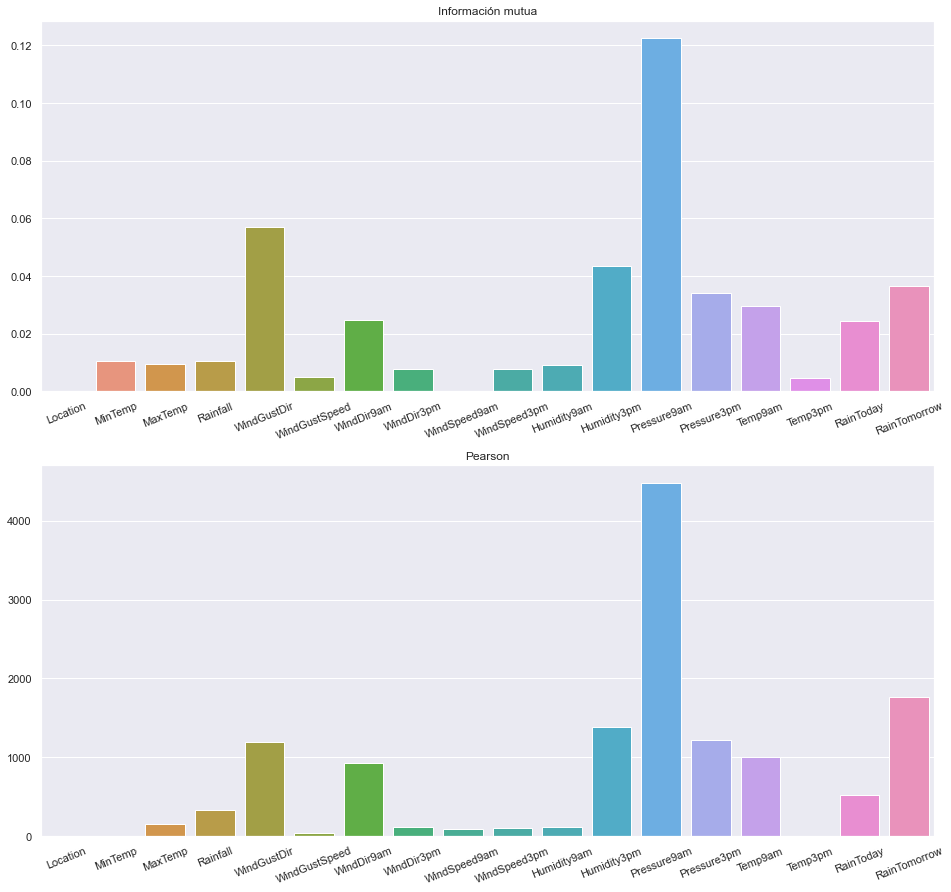

In [60]:
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import SelectKBest

def select_features_mutual_info(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_regression, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

def select_features_pearson(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=f_regression, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_mi, X_test_mi, mi = select_features_mutual_info(x_train_red, y_train_cca, x_train_red)
X_train_pc, X_test_pc, pc = select_features_pearson(x_test_red, y_test_cca, x_test_red)
fig,axes = plt.subplots(2,1,figsize=(16,15))
axes[0].set_title('Información mutua')
sns.barplot( x = [c for c in df_train.columns[:-1] ], y = mi.scores_,ax=axes[0])
axes[1].set_title('Pearson')
sns.barplot( x = [c for c in df_train.columns[:-1] ], y = pc.scores_,ax=axes[1]); #Grafico el F score de cada feature
pc.scores_
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=22)

#### Caso 2:
Haremos ingenieria de features para subsanar los datos faltantes.

In [61]:
data_c2 = data_weatherAUS.copy()
data_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [62]:
data_c2.drop(columns=['Evaporation'], inplace=True)
data_c2.drop(columns=['Sunshine'], inplace=True)
data_c2.drop(columns=['Cloud3pm'], inplace=True)
data_c2.drop(columns=['Cloud9am'], inplace=True)

In [63]:
c2_null, c2_p_null = calc_null(data_c2)
orden_c2 =  np.argsort(c2_p_null)[::-1]

print("Datos Faltantes:")
for i in range(len(orden_c2)):
    if c2_null[orden_c2[i]] != 0:
        print(f"{data_c2.columns[orden_c2[i]]}:\tDatos Nan: {c2_null[orden_c2[i]]}\tEn%: {c2_p_null[orden_c2[i]]}")

Datos Faltantes:
Pressure9am:	Datos Nan: 14014	En%: 9.85561877166949
Pressure3pm:	Datos Nan: 13981	En%: 9.832410878172624
WindDir9am:	Datos Nan: 10013	En%: 7.041837502549352
WindGustDir:	Datos Nan: 9330	En%: 6.561504434114197
WindGustSpeed:	Datos Nan: 9270	En%: 6.519308264119894
WindDir3pm:	Datos Nan: 3778	En%: 2.6569521706413113
Humidity3pm:	Datos Nan: 3610	En%: 2.5388028946572616
Temp3pm:	Datos Nan: 2726	En%: 1.9171126567411898
WindSpeed3pm:	Datos Nan: 2630	En%: 1.8495987847503041
Humidity9am:	Datos Nan: 1774	En%: 1.247600092831574
RainToday:	Datos Nan: 1406	En%: 0.9887969168665124
Rainfall:	Datos Nan: 1406	En%: 0.9887969168665124
WindSpeed9am:	Datos Nan: 1348	En%: 0.948007285872019
Temp9am:	Datos Nan: 904	En%: 0.635755627914173
MinTemp:	Datos Nan: 637	En%: 0.44798267143952236
MaxTemp:	Datos Nan: 322	En%: 0.22645277896942886


**RainToday** Comenzaremos con la feature "RainToday", esta es una feature categórica y binaria, donde alrededor del 1% de sus datos no son válidos. Considerando el bajo porcentaje se decidió borrar estas muestras con valores no válidos.

In [64]:
data_c2.dropna(subset=['RainToday'], inplace=True)

In [65]:
c2_null, c2_p_null = calc_null(data_c2)
orden_c2 =  np.argsort(c2_p_null)[::-1]

print("Datos Faltantes:")
for i in range(len(orden_c2)):
    if c2_null[orden_c2[i]] != 0:
        print(f"{data_c2.columns[orden_c2[i]]}:\tDatos Nan: {c2_null[orden_c2[i]]}\tEn%: {c2_p_null[orden_c2[i]]}")

Datos Faltantes:
Pressure3pm:	Datos Nan: 13769	En%: 9.780022303195608
Pressure9am:	Datos Nan: 13743	En%: 9.761554688998274
WindDir9am:	Datos Nan: 9660	En%: 6.861428967163161
WindGustDir:	Datos Nan: 9163	En%: 6.508413418852593
WindGustSpeed:	Datos Nan: 9105	En%: 6.467216433335464
WindDir3pm:	Datos Nan: 3670	En%: 2.6067747732390063
Humidity3pm:	Datos Nan: 3501	En%: 2.486735280956338
Temp3pm:	Datos Nan: 2624	En%: 1.8638084482232025
WindSpeed3pm:	Datos Nan: 2531	En%: 1.7977512128250477
Humidity9am:	Datos Nan: 1517	En%: 1.077514259129039
WindSpeed9am:	Datos Nan: 1055	En%: 0.7493589606994964
Temp9am:	Datos Nan: 656	En%: 0.4659521120558006
MinTemp:	Datos Nan: 468	En%: 0.33241705555200407
MaxTemp:	Datos Nan: 307	En%: 0.21805990609928474


**Temp9am y Temp3pm** como hemos visto en la sección anterior estas dos variables tienen gran correlación con MinTemp y MaxTemp respectivamente. Por ello, y porque tienen mayor cantidad de datos no válidos no utilizaremos estas features.

In [66]:
data_c2.drop(columns=['Temp3pm','Temp9am'], inplace=True)

Separo mi dataset en set de entrenamiento y test:

In [67]:
features = ['Month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', \
            'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', \
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday']

x_train_c2, x_test_c2, y_train_c2, y_test_c2 = train_test_split(
    data_c2[features], 
    data_c2['RainTomorrow'],  
    test_size=0.3,
    random_state=42)

In [68]:
x_train_c2, x_test_c2, y_train_c2, y_test_c2 = categoric_features(x_train_c2, x_test_c2, y_train_c2, y_test_c2)

In [69]:
x_train_c2.describe()

Month      Location       MinTemp       MaxTemp      Rainfall  \
count  98550.000000  98550.000000  98216.000000  98340.000000  98550.000000   
mean       6.402121     23.669163     12.186713     23.225978      2.382032   
std        3.428678     13.965868      6.415970      7.131436      8.668974   
min        1.000000      0.000000     -8.500000     -4.100000      0.000000   
25%        3.000000     11.000000      7.600000     17.900000      0.000000   
50%        6.000000     24.000000     12.000000     22.600000      0.000000   
75%        9.000000     36.000000     16.800000     28.300000      0.800000   
max       12.000000     48.000000     33.900000     48.100000    371.000000   

        WindGustDir  WindGustSpeed    WindDir9am    WindDir3pm  WindSpeed9am  \
count  92121.000000   92164.000000  91794.000000  95963.000000  97803.000000   
mean       0.475102      39.973298      0.504868      0.476105     13.986350   
std        0.349784      13.588388      0.359746      0.350224      8.875904   
min        0.000000       6.000000      0.000000      0.000000      0.000000   
25%        0.146447      31.000000      0.146447      0.146447      7.000000   
50%        0.500000      39.000000      0.500000      0.500000     13.000000   
75%        0.853553      48.000000      0.853553      0.853553     19.000000   
max        1.000000     135.000000      1.000000      1.000000    130.000000   

       WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am   Pressure3pm  \
count  96743.000000  97507.000000  96085.000000  88872.000000  88850.000000   
mean      18.632294     68.853334     51.475392   1017.659963   1015.267385   
std        8.780311     19.052969     20.832803      7.111800      7.044364   
min        0.000000      1.000000      0.000000    982.000000    977.100000   
25%       13.000000     57.000000     37.000000   1013.000000   1010.400000   
50%       19.000000     70.000000     52.000000   1017.600000   1015.300000   
75%       24.000000     83.000000     66.000000   1022.400000   1020.000000   
max       83.000000    100.000000    100.000000   1041.000000   1038.500000   

          RainToday  
count  98550.000000  
mean       0.223338  
std        0.416485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Para aquellos features con un porcentaje menor al 5% de Nan reemplazaremos estos valores por la mediana de su respectiva característica, ya que para distribuciones con oblicuidad es una mejor representación

In [70]:
x_train_c2['MinTemp']=x_train_c2['MinTemp'].fillna(x_train_c2['MinTemp'].median())
x_train_c2['MaxTemp']=x_train_c2['MaxTemp'].fillna(x_train_c2['MaxTemp'].median())
x_train_c2['WindSpeed9am']=x_train_c2['WindSpeed9am'].fillna(x_train_c2['WindSpeed9am'].median())
x_train_c2['Humidity9am']=x_train_c2['Humidity9am'].fillna(x_train_c2['Humidity9am'].median())
x_train_c2['WindSpeed3pm']=x_train_c2['WindSpeed3pm'].fillna(x_train_c2['WindSpeed3pm'].median())
x_train_c2['Rainfall']=x_train_c2['Rainfall'].fillna(x_train_c2['Rainfall'].median())
x_train_c2['WindDir3pm']=x_train_c2['WindDir3pm'].fillna(x_train_c2['WindDir3pm'].median())
x_train_c2['Humidity3pm']=x_train_c2['Humidity3pm'].fillna(x_train_c2['Humidity3pm'].median())

In [71]:
x_test_c2['MinTemp']=x_test_c2['MinTemp'].fillna(x_train_c2['MinTemp'].median())
x_test_c2['MaxTemp']=x_test_c2['MaxTemp'].fillna(x_train_c2['MaxTemp'].median())
x_test_c2['WindSpeed9am']=x_test_c2['WindSpeed9am'].fillna(x_train_c2['WindSpeed9am'].median())
x_test_c2['Humidity9am']=x_test_c2['Humidity9am'].fillna(x_train_c2['Humidity9am'].median())
x_test_c2['WindSpeed3pm']=x_test_c2['WindSpeed3pm'].fillna(x_train_c2['WindSpeed3pm'].median())
x_test_c2['Rainfall']=x_test_c2['Rainfall'].fillna(x_train_c2['Rainfall'].median())
x_test_c2['WindDir3pm']=x_test_c2['WindDir3pm'].fillna(x_train_c2['WindDir3pm'].median())
x_test_c2['Humidity3pm']=x_test_c2['Humidity3pm'].fillna(x_train_c2['Humidity3pm'].median())

In [72]:
xc2_null, xc2_p_null = calc_null(x_train_c2)
xorden_c2 =  np.argsort(xc2_p_null)[::-1]

print("Datos Faltantes:")
for i in range(len(xorden_c2)):
    if xc2_null[xorden_c2[i]] != 0:
        print(f"{x_train_c2.columns[xorden_c2[i]]}:\tDatos Nan: {xc2_null[xorden_c2[i]]}\tEn%: {xc2_p_null[xorden_c2[i]]}")

Datos Faltantes:
Pressure3pm:	Datos Nan: 9700	En%: 9.842719431760528
Pressure9am:	Datos Nan: 9678	En%: 9.820395738203958
WindDir9am:	Datos Nan: 6756	En%: 6.8554033485540335
WindGustDir:	Datos Nan: 6429	En%: 6.523592085235921
WindGustSpeed:	Datos Nan: 6386	En%: 6.479959411466261


Para los features restantes que poseen entre 5% y 10% de valores no validos aplicaremos el metodo KNN para estimar los valores 
faltantes por semejanza a los más próximos

In [73]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
x_train_knn = imputer.fit_transform(x_train_c2)
x_test_knn = imputer.fit_transform(x_test_c2)

In [74]:
x_train_c2.loc[:,'Pressure3pm'] = x_train_knn[:,14]
x_train_c2.loc[:,'Pressure9am'] = x_train_knn[:,13]
x_train_c2.loc[:,'WindGustDir'] = x_train_knn[:,6]
x_train_c2.loc[:,'WindGustSpeed'] = x_train_knn[:,7]
x_train_c2.loc[:,'WindDir9am'] = x_train_knn[:,8]

In [75]:
x_test_c2.loc[:,'Pressure3pm'] = x_test_knn[:,14]
x_test_c2.loc[:,'Pressure9am'] = x_test_knn[:,13]
x_test_c2.loc[:,'WindGustDir'] = x_test_knn[:,6]
x_test_c2.loc[:,'WindGustSpeed'] = x_test_knn[:,7]
x_test_c2.loc[:,'WindDir9am'] = x_test_knn[:,8]

Pearson/Info Mutua

In [78]:
sel_c2 = VarianceThreshold(threshold=0.01)
x_train_red_c2 = sel_c2.fit_transform(x_train_c2);
x_test_red_c2 = sel_c2.transform(x_test_c2)

In [79]:
df_train_c2 = pd.DataFrame(np.concatenate([x_train_c2,y_train_c2[:,np.newaxis]], axis=1), 
                        columns=data_c2.columns[np.concatenate([sel_c2.get_support(), [True]])])

<ipython-input-79-789df4703919>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train_c2 = pd.DataFrame(np.concatenate([x_train_c2,y_train_c2[:,np.newaxis]], axis=1),


In [80]:
r_c2 = df_train_c2.corr(method='pearson')
MI_c2 = mutual_info_regression(x_train_c2, y_train_c2)

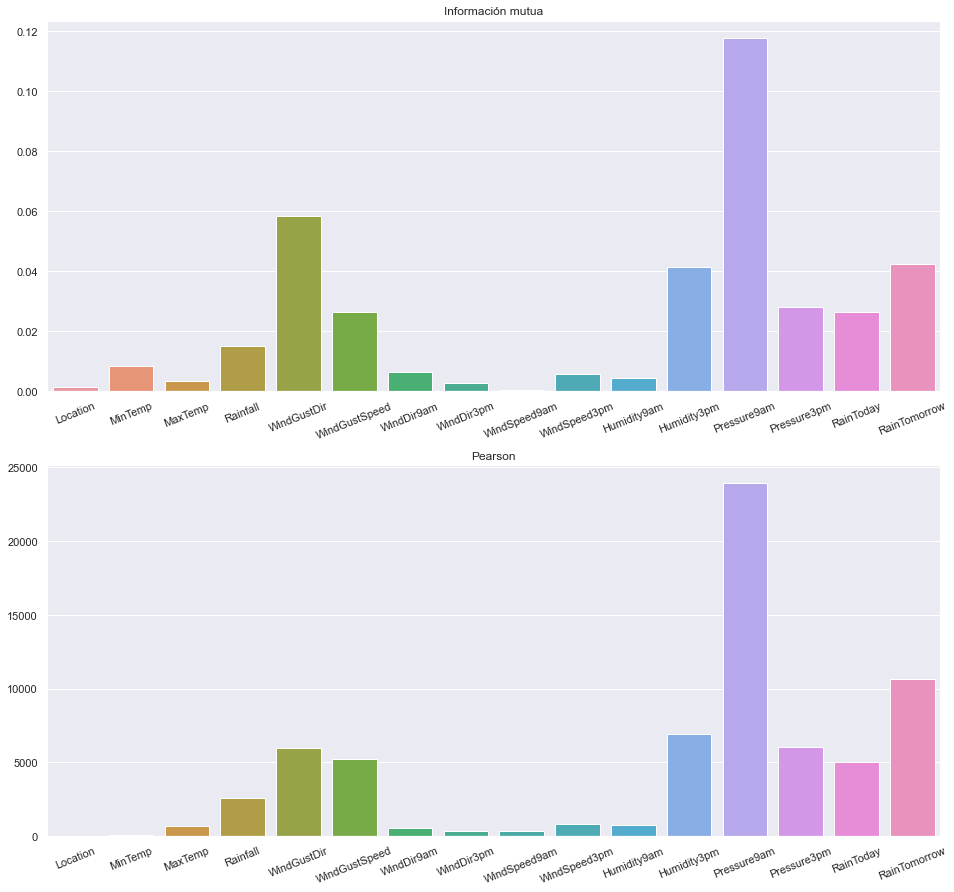

In [81]:
X_train_mi_c2, X_test_mi_c2, mi_c2 = select_features_mutual_info(x_train_red_c2, y_train_c2, x_test_red_c2)
X_train_pc_c2, X_test_pc_c2, pc_c2 = select_features_pearson(x_train_red_c2, y_train_c2, x_test_red_c2)
fig,axes = plt.subplots(2,1,figsize=(16,15))
axes[0].set_title('Información mutua')
sns.barplot( x = [c for c in df_train_c2.columns[:-1] ], y = mi_c2.scores_,ax=axes[0])
axes[1].set_title('Pearson')
sns.barplot( x = [c for c in df_train_c2.columns[:-1] ], y = pc_c2.scores_,ax=axes[1]); #Grafico el F score de cada feature
pc.scores_
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=22)

## 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).


In [82]:
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

logreg = LogisticRegression(random_state=42, solver='lbfgs')
randomf = RandomForestClassifier(n_estimators=200, random_state=42)
adaBoost = AdaBoostClassifier(n_estimators=200, random_state=42)


# Caso 1:
logreg.fit(x_train_cca, y_train_cca)
y_lr_cca = logreg.predict(x_test_cca)
#lr_cnf_matrix = metrics.confusion_matrix(y_test_cca, y_lr_cca)

randomf.fit(x_train_cca, y_train_cca)
y_rf_cca = randomf.predict(x_test_cca)
#rf_matrix = metrics.confusion_matrix(y_test_cca, y_rf_cca)

adaBoost.fit(x_train_cca, y_train_cca)
y_ab_cca = adaBoost.predict(x_test_cca)
#ab_cnf_matrix = metrics.confusion_matrix(y_test_cca, y_ab_cca)

# Caso 2: 
logreg.fit(x_train_c2, y_train_c2)
y_lr_c2 = logreg.predict(x_test_c2)
#lr_cnf_matrix_c2 = metrics.confusion_matrix(y_test_c2, y_lr_c2)

randomf.fit(x_train_c2, y_train_c2)
y_rf_c2 = randomf.predict(x_test_c2)
#rf_matrix_c2 = metrics.confusion_matrix(y_test_c2, y_rf_c2)

adaBoost.fit(x_train_c2, y_train_c2)
y_ab_c2 = adaBoost.predict(x_test_c2)
#ab_cnf_matrix_c2 = metrics.confusion_matrix(y_test_c2, y_ab_c2)



C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Agustin\anaconda3\envs\EspecializacionIA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test_cca, y_lr_cca))
print("Precision:",metrics.precision_score(y_test_cca, y_lr_cca))
print("Recall:",metrics.recall_score(y_test_cca, y_lr_cca))

Accuracy: 0.8481625900980739
Precision: 0.7450980392156863
Recall: 0.48381962864721484


In [84]:
results = pd.DataFrame(data=[[metrics.accuracy_score(y_test_cca, y_lr_cca), metrics.accuracy_score(y_test_c2, y_lr_c2)],\
                   [metrics.accuracy_score(y_test_cca, y_ab_cca), metrics.accuracy_score(y_test_c2, y_ab_c2)],\
                   [metrics.accuracy_score(y_test_cca, y_rf_cca), metrics.accuracy_score(y_test_c2, y_rf_c2)]],\
             index=["Regresion Logistica","AdaBoost","RandomForest"], columns=["Caso1", "Caso2"])

In [85]:
results

Caso1     Caso2
Regresion Logistica  0.848163  0.839406
AdaBoost             0.851944  0.844047
RandomForest         0.858029  0.853754

<AxesSubplot:title={'center':'Desempeño de modelos'}>

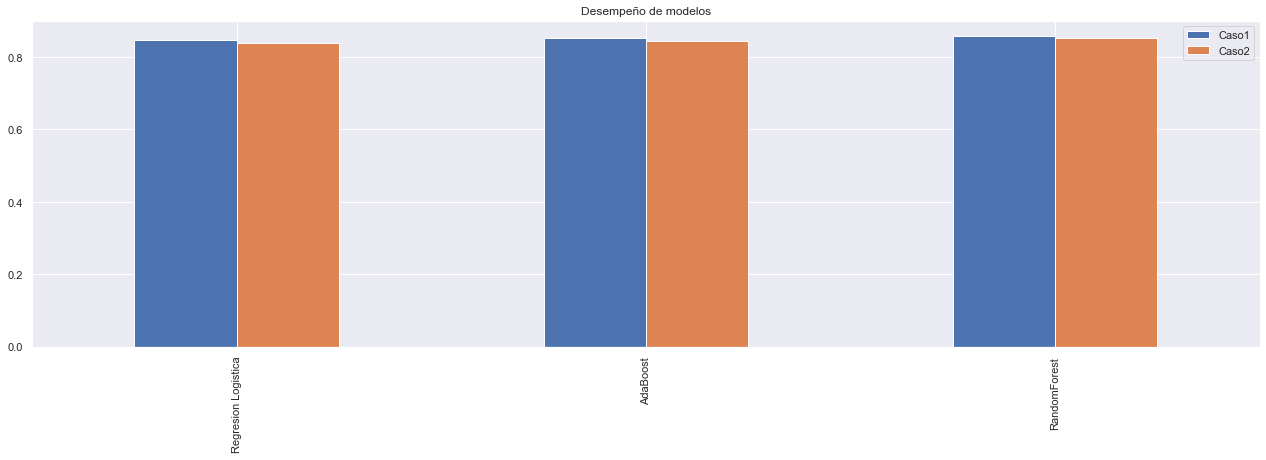

In [86]:
results.plot.bar(title="Desempeño de modelos",figsize=(22,6))

## 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

Como conclusión de los resultados obtenidos se encontró con que el modelo de Random Forest presenta una mayor precisión en la predicción de lluvia del día siguiente, al ser un modelo no lineal seguramente represente mucho mejor algunas relaciones algunos features y la salida que otros modelos como regresión lineal.

Por otro lado, se puede observar que el dataset al que se le eliminaron las muestras datos no válidos posee una mejor performance que el caso del modelo a la que se aplicó ingeniería de features. Esto se lo adjudico a que por ejemplo si vemos las gráficas de información mutua se encontro en el caso 1 que la salida depende mucho más de Temp9am (la cual fue eliminada en el caso 2) que de la TempMin.